In [3]:
import pandas as pd
import numpy as np
import zipfile
import os
from opencage.geocoder import OpenCageGeocode
import time
import matplotlib.pyplot as plt 
import seaborn as sns

In [23]:

zip_path = r"C:\Users\thort\Documents\DataSmart Point\Unterrichtsmaterialien\05. Python Weiterführung\04. Projektwoche\Projektdaten\airbnb.zip"
extract_path = 'airbnb'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
folder_path = r"C:\Users\thort\Documents\DataSmart Point\Unterrichtsmaterialien\05. Python Weiterführung\airbnb\airbnb"

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]   # Liste aller CSV-Dateien

all_dataframes = []   # leere Liste zum Sammeln der Dataframes
for filename in csv_files:
    city = filename.split('_')[0]       #jede CSV-Datei einlesen und city hinzufügen
    day_type = filename.split('_')[1].replace('.csv', '')
    df = pd.read_csv(os.path.join(folder_path, filename))
    df['city'] = city
    df['day-type'] = day_type
    all_dataframes.append(df)

df_original = pd.concat(all_dataframes, ignore_index=True)

### 2. Datengrundlage, was wird betrachtet

In [25]:
df_original.columns 

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'city', 'day-type'],
      dtype='object')

In [26]:
df_original.rename(columns={'Zimmr_shared': 'Zimmer_Shared'}, inplace=True)

df_original.rename(columns={'room_type': 'Raum_Art'}, inplace=True)
df_original.rename(columns={'city': 'Stadt'}, inplace=True)
df_original.rename(columns={'day-type': 'Tagestyp'}, inplace=True) 
df_original.rename(columns={'multi': 'Host_(2-4)'}, inplace=True)
df_original.rename(columns={'biz': 'Host_4+'}, inplace=True)
#df_original.drop(columns='Unnamed: 0', inplace=True)

In [27]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   Raum_Art                    51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   Host_(2-4)                  51707 non-null  int64  
 8   Host_4+                     51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

### 3. Daten prüfen und bereinigen

In [28]:
#df_original = pd.read_csv(r'C:\Users\thort\Documents\DataSmart Point\Unterrichtsmaterialien\05. Python Weiterführung\df_geocoded_partial.csv')

#df[df.isna().any(axis=1)]  # keine missing values missing values nur in Stadtteile wg reverse geocoding
#df.isnull().values.any()   # eine zweite Prüfung zur Sicherheit
#df[df['Entf_Stadtzentrum'].duplicated(keep=False)]     # keine Duplikate
#df

In [29]:
df_original = df_original.rename(columns={                          # deutsche Überschriften
    'realSum': '2N2P_Preis', 
    'room_shared': 'Zimmer_Shared', 
    'room_private': 'Zimmer_Privat',
    'person_capacity': 'Personenanzahl_max', 
    'host_is_superhost': 'Superhost', 
    'cleanliness_rating': 'Sauberkeitsbew.', 
    'guest_satisfaction_overall': 'Gästebewertung', 
    'bedrooms': 'Schlafzimmer_Anzahl', 
    'dist': 'Entf_Stadtzentrum',
    'metro_dist': 'Entf_Metrostation', 
    'attr_index': 'Attraktivität', 
    'attr_index_norm': 'Attraktivität_Normalisiert', 
    'rest_index': 'Restaurant_Index',
    'rest_index_norm': 'Restaurant_Index_Normalisiert'})

df_original

,Unnamed: 0,2N2P_Preis,Raum_Art,Zimmer_Shared,Zimmer_Privat,Personenanzahl_max,Superhost,Host_(2-4),Host_4+,Sauberkeitsbew.,...,Entf_Stadtzentrum,Entf_Metrostation,Attraktivität,Attraktivität_Normalisiert,Restaurant_Index,Restaurant_Index_Normalisiert,lng,lat,Stadt,Tagestyp
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,weekends
51703,1795,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,weekends
51704,1796,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna,weekends
51705,1797,301.054157,Private room,False,True,2.0,False,0,0,10.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,weekends


In [30]:
stadt_namen_deutsch = {'amsterdam': 'Amsterdam',                # Übersetzung der Städtenamen im Dictionary
                       'athens': 'Athen',
                       'barcelona': 'Barcelona',
                       'berlin': 'Berlin',
                       'budapest': 'Budapest',
                       'lisbon': 'Lissabon',
                       'london': 'London',
                       'paris': 'Paris',
                       'rome': 'Rom',
                       'vienna': 'Wien'
                       }

df_original['Stadt'] = df_original['Stadt'].map(stadt_namen_deutsch)   

In [31]:
tagestyp_deutsch = {'weekends': 'Wochenende',                # Übersetzung des Tagestyps im Dictionary
                       'weekdays': 'Wochentags'
                       }

df_original['Tagestyp'] = df_original['Tagestyp'].map(tagestyp_deutsch) 

In [32]:
raum_art_deutsch = {'Private room': 'Privatzimmer',                # Übersetzung der Raumart im Dictionary
                       'Entire home/apt': 'Appartement',
                       'Shared room': 'gemeinsames Zimmer'
                       }

df_original['Raum_Art'] = df_original['Raum_Art'].map(raum_art_deutsch) 

In [33]:
df_original

,Unnamed: 0,2N2P_Preis,Raum_Art,Zimmer_Shared,Zimmer_Privat,Personenanzahl_max,Superhost,Host_(2-4),Host_4+,Sauberkeitsbew.,...,Entf_Stadtzentrum,Entf_Metrostation,Attraktivität,Attraktivität_Normalisiert,Restaurant_Index,Restaurant_Index_Normalisiert,lng,lat,Stadt,Tagestyp
0,0,194.033698,Privatzimmer,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Wochentags
1,1,344.245776,Privatzimmer,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Wochentags
2,2,264.101422,Privatzimmer,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Wochentags
3,3,433.529398,Privatzimmer,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Wochentags
4,4,485.552926,Privatzimmer,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Wochentags
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,Appartement,False,False,6.0,False,0,1,10.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Wien,Wochenende
51703,1795,304.793960,Appartement,False,False,2.0,False,0,0,8.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Wien,Wochenende
51704,1796,637.168969,Appartement,False,False,2.0,False,0,0,10.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,Wien,Wochenende
51705,1797,301.054157,Privatzimmer,False,True,2.0,False,0,0,10.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Wien,Wochenende


### Feature Engeneering

In [34]:
# Reverse Geocoding

key = '8cea2cf58ca445639d03671f2a58fb41'
geocoder = OpenCageGeocode(key)                                           

# Neue leere Spalte für Stadtteil
df_original['Stadtteil'] = None

# Durch alle Zeilen iterieren
for index, row in df_original.iterrows():
    lat = row['lat']
    lng = row['lng']

    try:
        result = geocoder.reverse_geocode(lat, lng)

        if result and 'suburb' in result[0]['components']:
            stadtteil = result[0]['components']['suburb']
        elif 'neighbourhood' in result[0]['components']:
            stadtteil = result[0]['components']['neighbourhood']
        else:
            stadtteil = None

        df_original.at[index, 'Stadtteil'] = stadtteil

    except Exception as e:
        print(f"Fehler bei Index {index}: {e}")
        df_original.at[index, 'Stadtteil'] = None

    time.sleep(1.2)  # API-Limit einhalten (max. 1 Anfrage pro Sekunde)

 

Fehler bei Index 2500: You have used the requests available on your plan. Please purchase more if you wish to continue: https://opencagedata.com/pricing
Fehler bei Index 2501: You have used the requests available on your plan. Please purchase more if you wish to continue: https://opencagedata.com/pricing
Fehler bei Index 2502: You have used the requests available on your plan. Please purchase more if you wish to continue: https://opencagedata.com/pricing
Fehler bei Index 2503: You have used the requests available on your plan. Please purchase more if you wish to continue: https://opencagedata.com/pricing
Fehler bei Index 2504: You have used the requests available on your plan. Please purchase more if you wish to continue: https://opencagedata.com/pricing
Fehler bei Index 2505: You have used the requests available on your plan. Please purchase more if you wish to continue: https://opencagedata.com/pricing
Fehler bei Index 2506: You have used the requests available on your plan. Please p

KeyboardInterrupt: 

In [ ]:
'''
# hier ein zweites Ml durchgeführt, um noch nicht erfasste Werte zu ergänzen
key = '8cea2cf58ca445639d03671f2a58fb41'
geocoder = OpenCageGeocode(key)



for index, row in df_original[df_original['Stadtteil'].isna()].iterrows():
    lat = row['lat']
    lng = row['lng']

    try:
        result = geocoder.reverse_geocode(lat, lng)

        if result and 'suburb' in result[0]['components']:
            stadtteil = result[0]['components']['suburb']
        elif 'neighbourhood' in result[0]['components']:
            stadtteil = result[0]['components']['neighbourhood']
        else:
            stadtteil = None

        df_original.at[index, 'Stadtteil'] = stadtteil

    except Exception as e:
        print(f"Fehler bei Index {index}: {e}")
        df_original.at[index, 'Stadtteil'] = None
    if index % 100 == 0:
        df_original.to_csv('df_geocoded_partial.csv', index=False)

    time.sleep(1.2)

'''

'\n# hier ein zweites Ml durchgeführt, um noch nicht erfasste Werte zu ergänzen\nkey = \'8cea2cf58ca445639d03671f2a58fb41\'\ngeocoder = OpenCageGeocode(key)\n\n\n\nfor index, row in df_original[df_original[\'Stadtteil\'].isna()].iterrows():\n    lat = row[\'lat\']\n    lng = row[\'lng\']\n\n    try:\n        result = geocoder.reverse_geocode(lat, lng)\n\n        if result and \'suburb\' in result[0][\'components\']:\n            stadtteil = result[0][\'components\'][\'suburb\']\n        elif \'neighbourhood\' in result[0][\'components\']:\n            stadtteil = result[0][\'components\'][\'neighbourhood\']\n        else:\n            stadtteil = None\n\n        df_original.at[index, \'Stadtteil\'] = stadtteil\n\n    except Exception as e:\n        print(f"Fehler bei Index {index}: {e}")\n        df_original.at[index, \'Stadtteil\'] = None\n    if index % 100 == 0:\n        df_original.to_csv(\'df_geocoded_partial.csv\', index=False)\n\n    time.sleep(1.2)\n\n'

In [35]:
df_original.columns

Index(['Unnamed: 0', '2N2P_Preis', 'Raum_Art', 'Zimmer_Shared',
       'Zimmer_Privat', 'Personenanzahl_max', 'Superhost', 'Host_(2-4)',
       'Host_4+', 'Sauberkeitsbew.', 'Gästebewertung', 'Schlafzimmer_Anzahl',
       'Entf_Stadtzentrum', 'Entf_Metrostation', 'Attraktivität',
       'Attraktivität_Normalisiert', 'Restaurant_Index',
       'Restaurant_Index_Normalisiert', 'lng', 'lat', 'Stadt', 'Tagestyp',
       'Stadtteil'],
      dtype='object')

In [36]:
df_original.to_csv('df_original.csv', index=False)

In [37]:
df_original.loc[:, 'Häufigkeiten'] = df_original.groupby(['lat', 'lng', 'Raum_Art', 'Personenanzahl_max'])['2N2P_Preis'].transform('count')

In [38]:
df = df_original

In [39]:
einteilung = {
    'Centrum': 'touristisch',
    'West': 'gemischt',
    'Zuid': 'geschäftlich',
    'Oost': 'wohnorientiert',
    'Nieuw-West': 'wohnorientiert',
    'Noord': 'gemischt',
    'Zuidost': 'geschäftlich',
    'Westpoort': 'wirtschaftlich'
}

df['Stadtteil_Typ'] = df['Stadtteil'].map(einteilung)   # eine Spalte 'Stadtteil_Typ hinzugefügt

In [40]:
df['Preiskategorie'] = df.groupby('Stadt')['2N2P_Preis'].transform(                 # Preisklassen automatisch in 4 Gruppen einteilen
    lambda x: pd.cut(x.rank(method='average'), bins=4, labels=['Niedrig', 'Mittel', 'Hoch', 'Sehr hoch']))  # Spalte Preiskategorie eingerichtet

In [41]:
def anbieter_typ(row):                                  # neue Spalte zur Anbieterklassifikation, namens 'Anbieter_Typ
    if row['Host_4+'] == 1:
        return 'Profianbieter'                          # wichtig für Superhost
    elif row['Host_(2-4)'] == 1:
        return 'Multianbieter'
    else:
        return 'Einzelanbieter'

df['Anbieter_Typ'] = df.apply(anbieter_typ, axis=1)

In [42]:
df.columns

Index(['Unnamed: 0', '2N2P_Preis', 'Raum_Art', 'Zimmer_Shared',
       'Zimmer_Privat', 'Personenanzahl_max', 'Superhost', 'Host_(2-4)',
       'Host_4+', 'Sauberkeitsbew.', 'Gästebewertung', 'Schlafzimmer_Anzahl',
       'Entf_Stadtzentrum', 'Entf_Metrostation', 'Attraktivität',
       'Attraktivität_Normalisiert', 'Restaurant_Index',
       'Restaurant_Index_Normalisiert', 'lng', 'lat', 'Stadt', 'Tagestyp',
       'Stadtteil', 'Häufigkeiten', 'Stadtteil_Typ', 'Preiskategorie',
       'Anbieter_Typ'],
      dtype='object')

# Analyse startet hier
### 4. Verteilung der Unterkunftstypen mit Städtevergleich


In [43]:
einzigartige_unterkuenfte = df.drop_duplicates( subset=['Stadt', 'lng', 'lat', 'Raum_Art', 'Personenanzahl_max']) #eindeutige Kombi je Unterkunft

anzahl_unterkuenfte_pro_stadt = einzigartige_unterkuenfte['Stadt'].value_counts()   # zählt die Anzahl unterschiedlicher Unterkünfte pro Stadt

print(anzahl_unterkuenfte_pro_stadt)

Stadt
London       5898
Rom          5380
Paris        3999
Lissabon     3370
Athen        3097
Budapest     2582
Wien         2127
Barcelona    1827
Berlin       1513
Amsterdam    1368
Name: count, dtype: int64


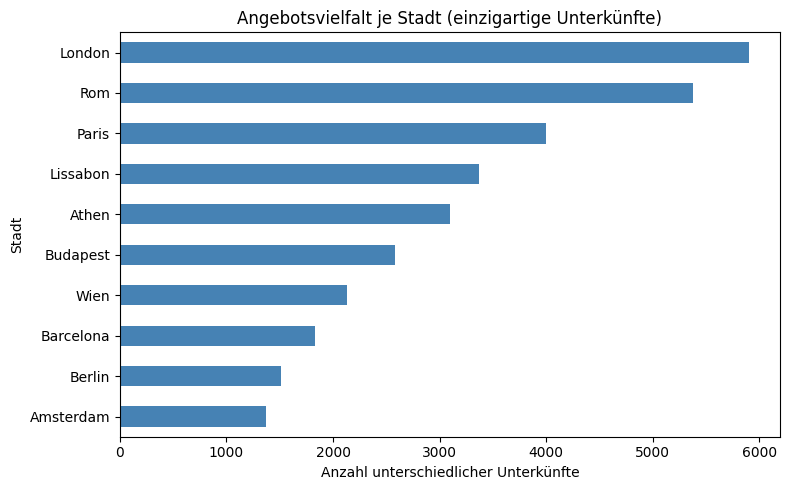

In [44]:
anzahl_unterkuenfte_pro_stadt.sort_values().plot(               # Einzigartige Unterkünfte
    kind='barh', figsize=(8, 5), color='steelblue'
)

plt.xlabel('Anzahl unterschiedlicher Unterkünfte')
plt.title('Angebotsvielfalt je Stadt (einzigartige Unterkünfte)')
plt.tight_layout()
plt.show()

In [45]:
# Anzahl der Buchungen
df['Raum_Art'].value_counts()

Raum_Art
Appartement           32648
Privatzimmer          18693
gemeinsames Zimmer      366
Name: count, dtype: int64

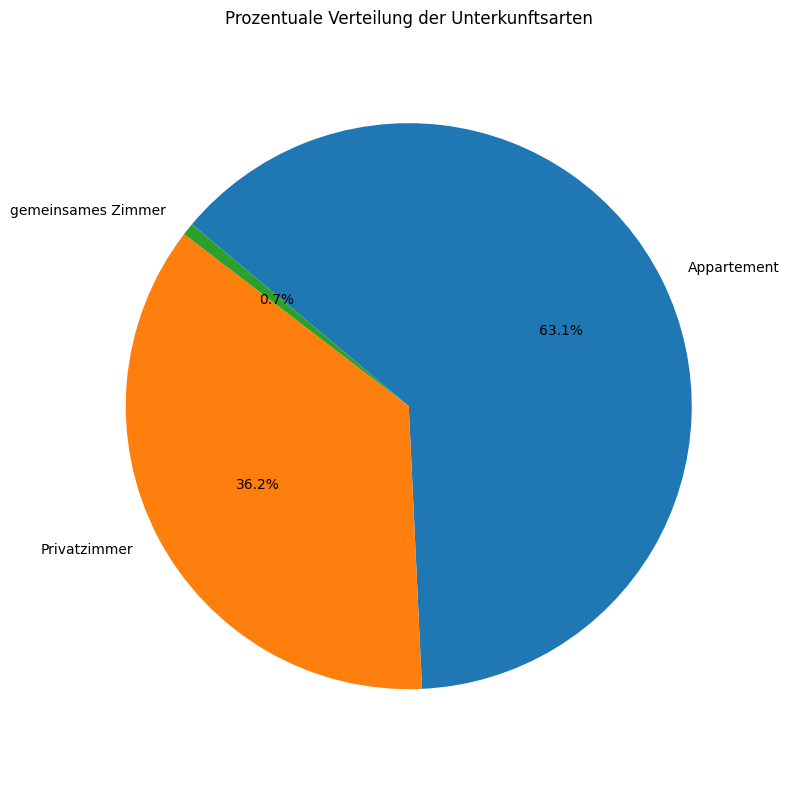

In [46]:
raum_art_verteilung = df['Raum_Art'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(raum_art_verteilung, labels=raum_art_verteilung.index, autopct='%1.1f%%', startangle=140, counterclock=False)
plt.title('Prozentuale Verteilung der Unterkunftsarten')
plt.axis('equal')  #Kreis statt Ellipse
plt.tight_layout()
plt.show()

In [47]:
# Einmalige Unterkünfte mit Häufigkeit extrahieren
einzigartige_unterkuenfte = df.drop_duplicates(subset=['Stadt', 'lng', 'lat', 'Raum_Art', 'Personenanzahl_max'])

# Dann die tatsächliche Buchungsanzahl pro Stadt aufsummieren
buchungen_pro_stadt = (
    einzigartige_unterkuenfte
    .groupby('Stadt')['Häufigkeiten']
    .sum()
    .sort_values(ascending=False)
)

print(buchungen_pro_stadt)
print(f"\nGesamtsumme aller Buchungen: {buchungen_pro_stadt.sum():,.0f}")

Stadt
London       9993
Rom          9027
Paris        6688
Lissabon     5763
Athen        5280
Budapest     4022
Wien         3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: Häufigkeiten, dtype: int64

Gesamtsumme aller Buchungen: 51,707


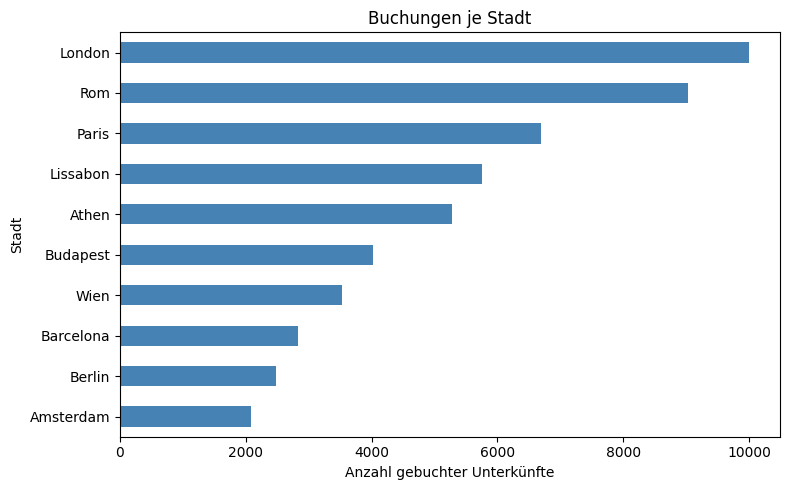

In [48]:
buchungen_pro_stadt.sort_values().plot(               # Einzigartige Unterkünfte
    kind='barh', figsize=(8, 5), color='steelblue'
)

plt.xlabel('Anzahl gebuchter Unterkünfte')
plt.title('Buchungen je Stadt')
plt.tight_layout()
plt.show()

In [49]:
raumtypen_anzahl = df.groupby(['Stadt', 'Raum_Art']).size().reset_index(name='Anzahl')  # gruppieren und zählen

raumtypen_anzahl['Prozent'] = raumtypen_anzahl.groupby('Stadt')['Anzahl'].transform(
    lambda x: round(x / x.sum() * 100, 2))                                              # Prozent je Stadt berechnen

raumtypen_prozent = raumtypen_anzahl.sort_values(['Stadt', 'Prozent'], ascending=[True, False]) # Ergebnis sortieren

print(raumtypen_prozent)

        Stadt            Raum_Art  Anzahl  Prozent
0   Amsterdam         Appartement    1126    54.13
1   Amsterdam        Privatzimmer     944    45.38
2   Amsterdam  gemeinsames Zimmer      10     0.48
3       Athen         Appartement    4872    92.27
4       Athen        Privatzimmer     397     7.52
5       Athen  gemeinsames Zimmer      11     0.21
7   Barcelona        Privatzimmer    2279    80.44
6   Barcelona         Appartement     542    19.13
8   Barcelona  gemeinsames Zimmer      12     0.42
10     Berlin        Privatzimmer    1529    61.55
9      Berlin         Appartement     882    35.51
11     Berlin  gemeinsames Zimmer      73     2.94
12   Budapest         Appartement    3589    89.23
13   Budapest        Privatzimmer     419    10.42
14   Budapest  gemeinsames Zimmer      14     0.35
15   Lissabon         Appartement    3878    67.29
16   Lissabon        Privatzimmer    1811    31.42
17   Lissabon  gemeinsames Zimmer      74     1.28
19     London        Privatzimm

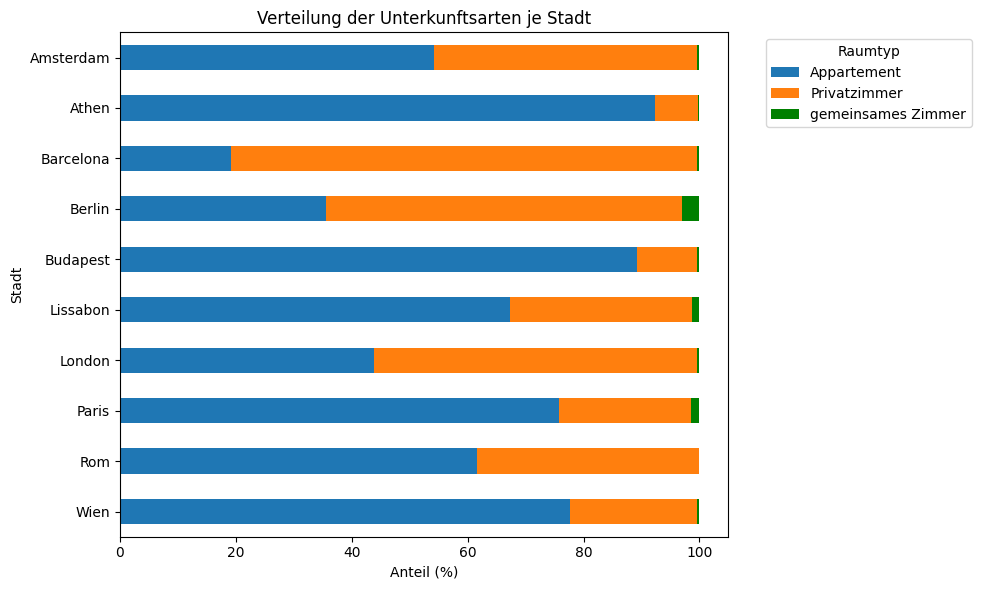

In [50]:
# Daten umformen für gestapelten Plot
pivot = raumtypen_prozent.pivot(index='Stadt', columns='Raum_Art', values='Prozent').fillna(0)

pivot = pivot.sort_index(ascending=False)
# Gestapelter Balkenplot
pivot.plot(kind='barh', stacked=True, figsize=(10, 6), color=[ '#1f77b4', '#ff7f0e','green'])

plt.xlabel('Anteil (%)')
plt.title('Verteilung der Unterkunftsarten je Stadt')
plt.legend(title='Raumtyp', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\thort\AppData\Local\Temp\ipykernel_40156\4138594532.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gesamt_preis_raum = df.groupby(['Preiskategorie', 'Raum_Art']).size().reset_index(name='Anzahl')


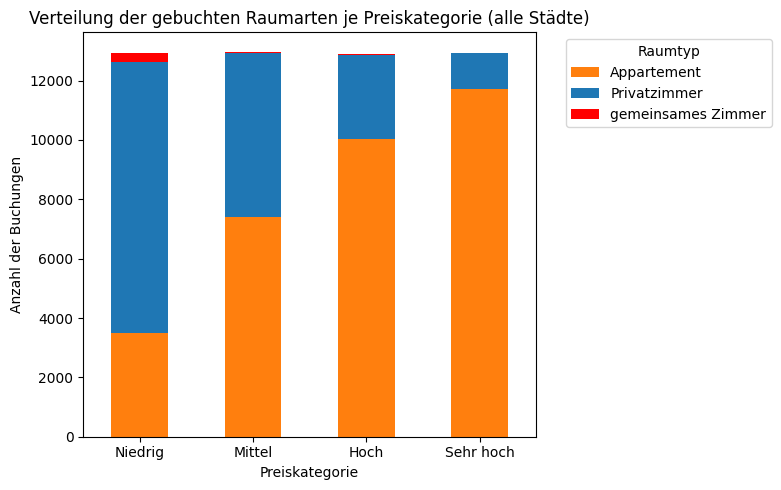

In [51]:
# Gruppierung über ALLE Städte hinweg (Stadt wird ignoriert)
gesamt_preis_raum = df.groupby(['Preiskategorie', 'Raum_Art']).size().reset_index(name='Anzahl')

# Pivotieren für gestapeltes Balkendiagramm
pivot_plot = gesamt_preis_raum.pivot(index='Preiskategorie', columns='Raum_Art', values='Anzahl').fillna(0)

# Reihenfolge der Preiskategorien sicherstellen
pivot_plot = pivot_plot.reindex(['Niedrig', 'Mittel', 'Hoch', 'Sehr hoch'])

# Plot
pivot_plot.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#ff7f0e', '#1f77b4', 'red'])

plt.title('Verteilung der gebuchten Raumarten je Preiskategorie (alle Städte)')
plt.xlabel('Preiskategorie')
plt.ylabel('Anzahl der Buchungen')
plt.xticks(rotation=0)
plt.legend(title='Raumtyp', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Anbieter-Typen

     Anbieter_Typ  Anzahl_Unterkuenfte  Anteil_Prozent
0  Einzelanbieter                18534       35.844276
1   Profianbieter                18108       35.020403
2   Multianbieter                15065       29.135320


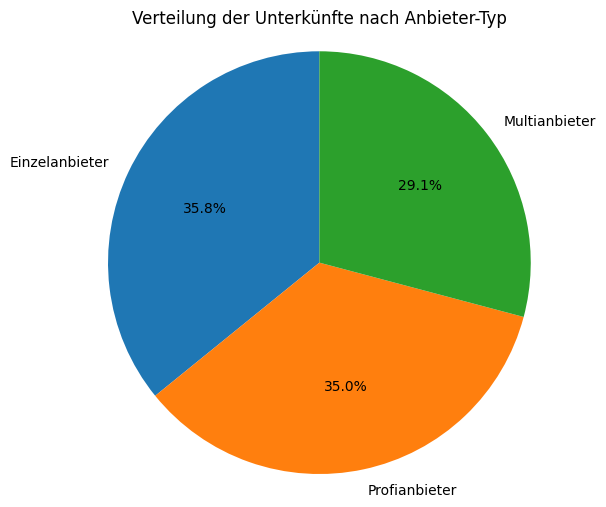

In [52]:
anbieter_stats = df['Anbieter_Typ'].value_counts().reset_index()    # Auswertung wieviel Unterkünfte je Anbieter_Typ vorhanden ist
anbieter_stats.columns = ['Anbieter_Typ', 'Anzahl_Unterkuenfte']    # Ich erzeuge einen virtuellen DF 'anbieter_stats' mit zwei Spalten, 'index' und 
                                                                    # 'Anbieter_Typ', ohne den eigenlichen DF zu verändern. Ersetze index durch Anzahl_Unterkuenfte
gesamt = anbieter_stats['Anzahl_Unterkuenfte'].sum()                # Berechne die Gesamtsumme mit einer Hilfsvariablen
anbieter_stats['Anteil_Prozent'] = 100 * anbieter_stats['Anzahl_Unterkuenfte'] / gesamt # Erzeuge eine neue Spalte 'Anteil_Prozent im Df anbieter_stats

print(anbieter_stats)

plt.figure(figsize=(6, 6))                                          # Kreisdiagramm erstellen
plt.pie(anbieter_stats['Anzahl_Unterkuenfte'],
        labels=anbieter_stats['Anbieter_Typ'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Verteilung der Unterkünfte nach Anbieter-Typ')
plt.axis('equal')       # Kreisform erzwingen
plt.show()

In [53]:
kreuztabelle = pd.crosstab(df_original['Anbieter_Typ'], df_original['Raum_Art'])  # absolute Häufigkeit je Anbieter_Typ und Raum_Art

anteile = kreuztabelle.div(kreuztabelle.sum(axis=1), axis=0) * 100  # in Prozent je Anbietergruppe umrechnen

anteile = anteile.round(1)

print(anteile)

Raum_Art        Appartement  Privatzimmer  gemeinsames Zimmer
Anbieter_Typ                                                 
Einzelanbieter         69.2          30.4                 0.4
Multianbieter          53.1          46.4                 0.5
Profianbieter          65.3          33.5                 1.2


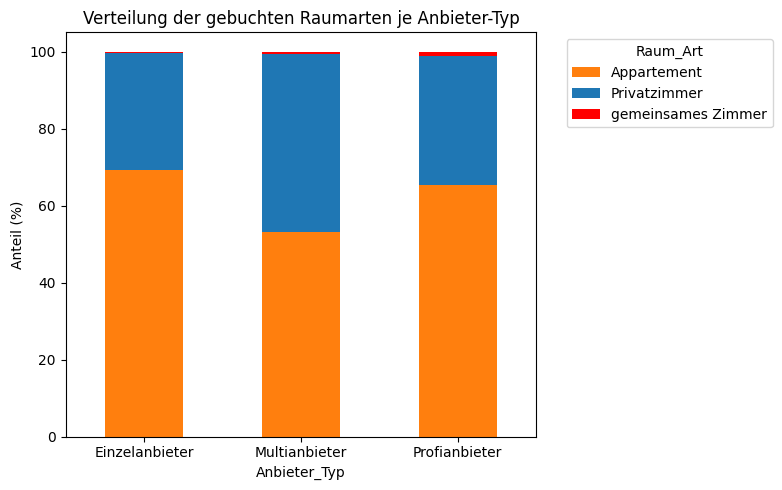

In [54]:
anteile.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#ff7f0e', '#1f77b4', 'red'])
plt.ylabel('Anteil (%)')
plt.title('Verteilung der gebuchten Raumarten je Anbieter-Typ')
plt.legend(title='Raum_Art', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 5. Preisbildung & Preisanalyse nach Unterkunftstyp
##### Ausreißerverhalten

In [55]:
df.columns

Index(['Unnamed: 0', '2N2P_Preis', 'Raum_Art', 'Zimmer_Shared',
       'Zimmer_Privat', 'Personenanzahl_max', 'Superhost', 'Host_(2-4)',
       'Host_4+', 'Sauberkeitsbew.', 'Gästebewertung', 'Schlafzimmer_Anzahl',
       'Entf_Stadtzentrum', 'Entf_Metrostation', 'Attraktivität',
       'Attraktivität_Normalisiert', 'Restaurant_Index',
       'Restaurant_Index_Normalisiert', 'lng', 'lat', 'Stadt', 'Tagestyp',
       'Stadtteil', 'Häufigkeiten', 'Stadtteil_Typ', 'Preiskategorie',
       'Anbieter_Typ'],
      dtype='object')

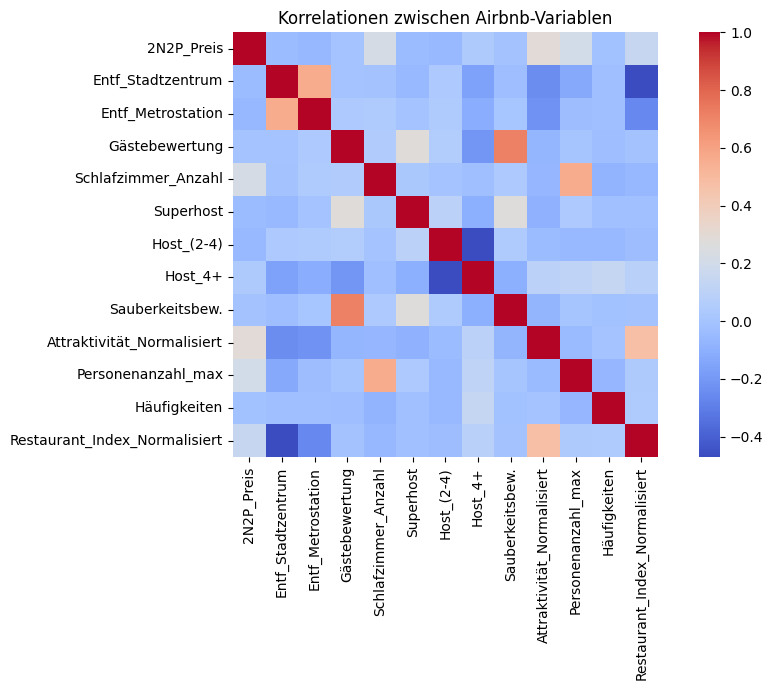

In [56]:
corr_matrix = df[['2N2P_Preis', 'Entf_Stadtzentrum', 'Entf_Metrostation', 'Gästebewertung', 'Schlafzimmer_Anzahl', 'Superhost', 'Host_(2-4)', 'Host_4+',
                  'Sauberkeitsbew.', 'Attraktivität_Normalisiert', 'Personenanzahl_max', 'Häufigkeiten', 'Restaurant_Index_Normalisiert']].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Korrelationen zwischen Airbnb-Variablen')
plt.tight_layout()
plt.show()

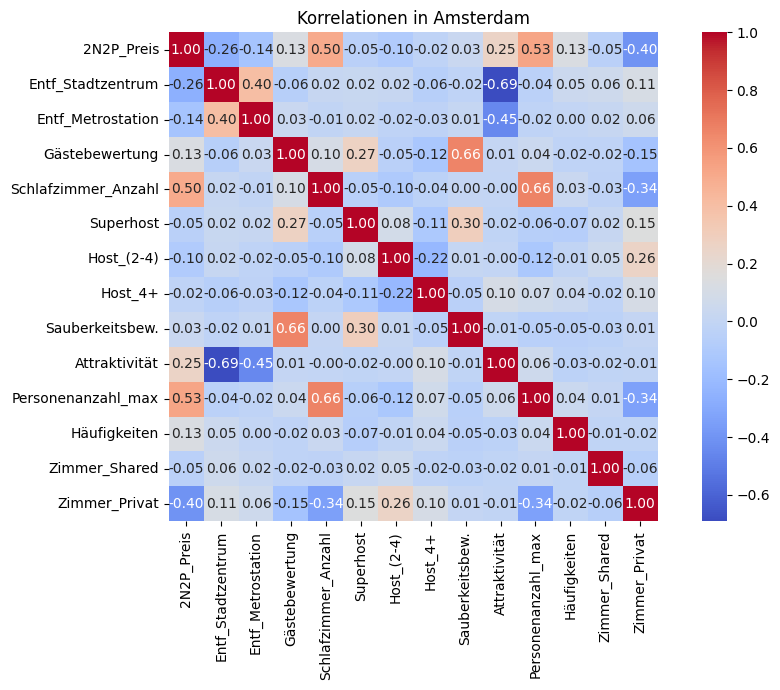

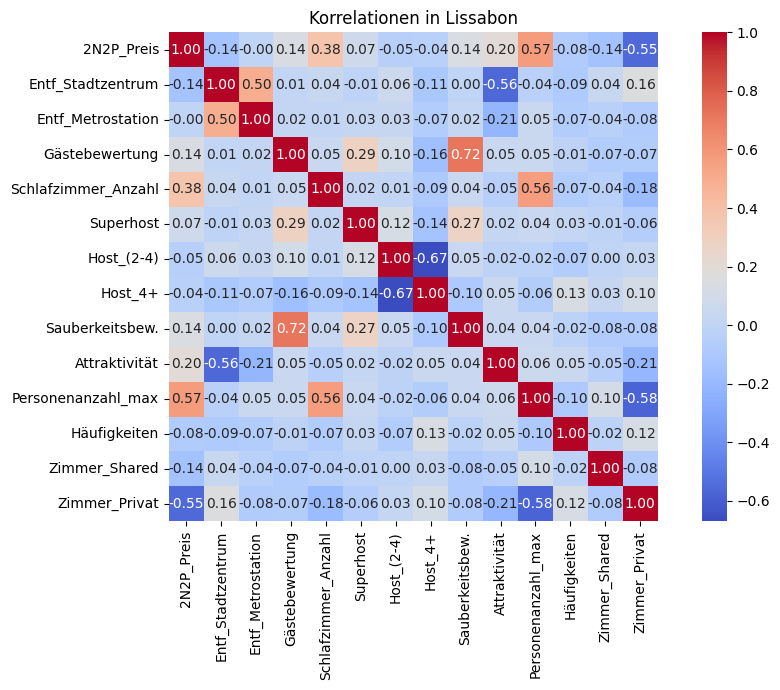

In [57]:
cities = ['Amsterdam', 'Lissabon']

# Nur numerische Spalten, keine Strings wie "Anbieter_Typ"
spalten = ['2N2P_Preis', 'Entf_Stadtzentrum', 'Entf_Metrostation', 'Gästebewertung',
           'Schlafzimmer_Anzahl', 'Superhost', 'Host_(2-4)', 'Host_4+',
           'Sauberkeitsbew.', 'Attraktivität', 'Personenanzahl_max',
           'Häufigkeiten', 'Zimmer_Shared', 'Zimmer_Privat']

# Heatmaps erzeugen
for city in cities:
    stadt_df = df[df['Stadt'] == city][spalten]
    corr = stadt_df.corr()

    plt.figure(figsize=(10, 7))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title(f'Korrelationen in {city}')
    plt.tight_layout()
    plt.show()

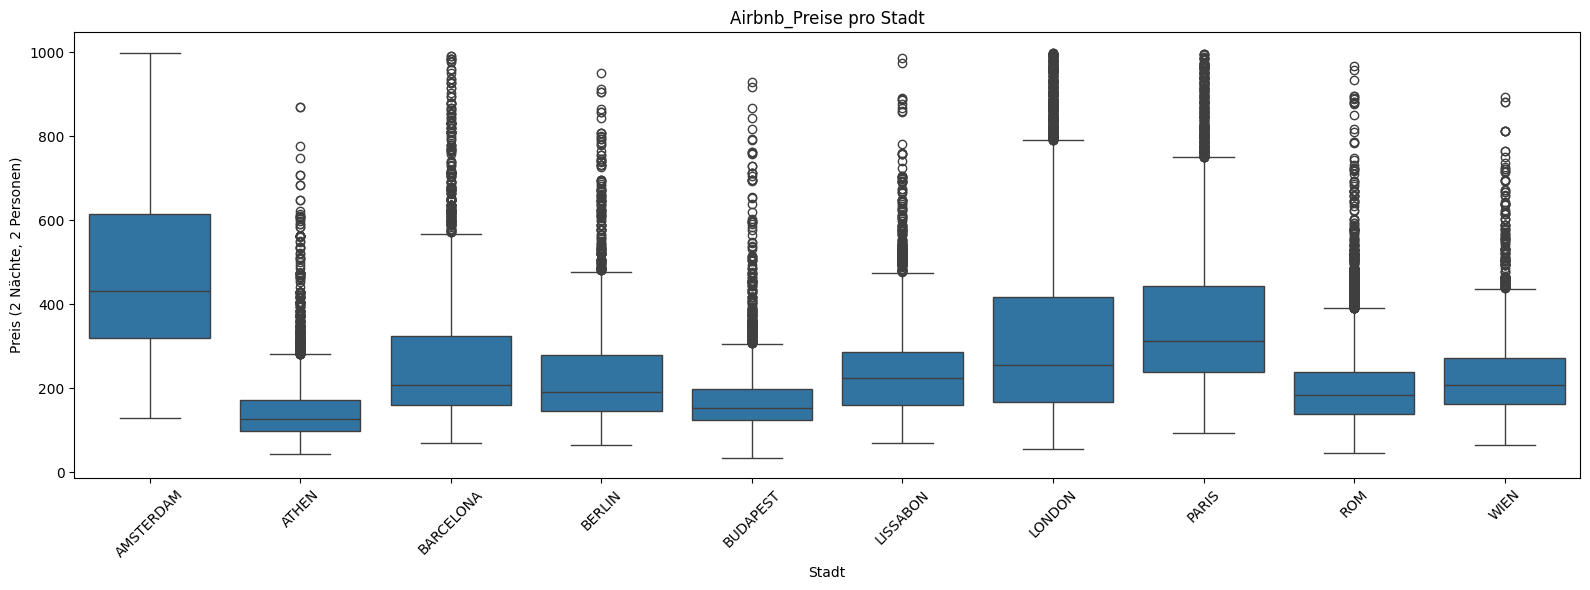

In [58]:
df_filtered = df[df['2N2P_Preis'] < 1000]                          # Ausreißer auf unter 1000 begrenzt
cities = sorted(df_filtered['Stadt'].unique())

plt.figure(figsize=(16,6))
sns.boxplot(data=df_filtered, x='Stadt', y='2N2P_Preis', order=cities)

plt.title('Airbnb_Preise pro Stadt')
plt.xlabel
plt.ylabel('Preis (2 Nächte, 2 Personen)')
plt.xticks(ticks=range(len(cities)), labels=[city.upper() for city in cities], rotation=45)
plt.tight_layout()
plt.show()

In [59]:
gesamt = df.groupby('Stadt')['2N2P_Preis'].count()                                  # hier berechne ich die Gesamtanzahl und die
unter_1000 = df[df['2N2P_Preis'] < 1000].groupby('Stadt')['2N2P_Preis'].count()     # Anzahl unter 1000 pro Stadt

anteil_unter_1000 = (unter_1000 / gesamt * 100).round(2)                            # prozentualer Anteil berechnet

anteil_df = anteil_unter_1000.reset_index().rename(columns={'2N2P_Preis': 'Anteil < 1000 € (%)'})

print(anteil_df)

       Stadt  Anteil < 1000 € (%)
0  Amsterdam                90.14
1      Athen                99.94
2  Barcelona                98.91
3     Berlin                99.32
4   Budapest                99.83
5   Lissabon                99.95
6     London                97.05
7      Paris                97.25
8        Rom                99.75
9       Wien                99.92


In [60]:
top10 = df.dropna(subset=['2N2P_Preis']).sort_values(by='2N2P_Preis', ascending=False).round(2).head(10)

buchungshaeufigkeit = df.groupby(['lat', 'lng', 'Raum_Art']).size().reset_index(name='Buchungen')

top10_mit_haeufigkeit = pd.merge(top10, buchungshaeufigkeit, on=['lat', 'lng', 'Raum_Art'], how='left') # Buchungshäufigkeit zu den Top10 mergen

print(top10_mit_haeufigkeit[['2N2P_Preis', 'Stadt', 'Raum_Art', 'Personenanzahl_max', 'Sauberkeitsbew.', 'Gästebewertung', 'Superhost']])

   2N2P_Preis   Stadt      Raum_Art  Personenanzahl_max  Sauberkeitsbew.  \
0    18545.45   Athen   Appartement                 2.0             10.0   
1    16445.61   Paris   Appartement                 2.0              9.0   
2    15499.89  London   Appartement                 3.0             10.0   
3    13664.31    Wien  Privatzimmer                 2.0              9.0   
4    13656.36    Wien  Privatzimmer                 2.0              9.0   
5    12942.99    Wien   Appartement                 4.0              7.0   
6    12937.28  London   Appartement                 6.0             10.0   
7    12929.51  London  Privatzimmer                 2.0              7.0   
8    12886.24  London  Privatzimmer                 2.0              7.0   
9    12886.24  London   Appartement                 6.0             10.0   

   Gästebewertung  Superhost  
0           100.0       True  
1           100.0      False  
2            95.0       True  
3            87.0      False  
4       

## Vergleich der Wochenendepreise  zu den Wochentagspreisen


        Stadt    Tagestyp  2N2P_Preis
0   Amsterdam  Wochenende      604.83
1   Amsterdam  Wochentags      545.02
2       Athen  Wochenende      147.58
3       Athen  Wochentags      155.87
4   Barcelona  Wochenende      300.28
5   Barcelona  Wochentags      288.39
6      Berlin  Wochenende      249.25
7      Berlin  Wochentags      240.22
8    Budapest  Wochenende      185.12
9    Budapest  Wochentags      168.43
10   Lissabon  Wochenende      240.04
11   Lissabon  Wochentags      236.35
12     London  Wochenende      364.39
13     London  Wochentags      360.23
14      Paris  Wochenende      387.03
15      Paris  Wochentags      398.79
16        Rom  Wochenende      209.13
17        Rom  Wochentags      201.62
18       Wien  Wochenende      242.74
19       Wien  Wochentags      240.38


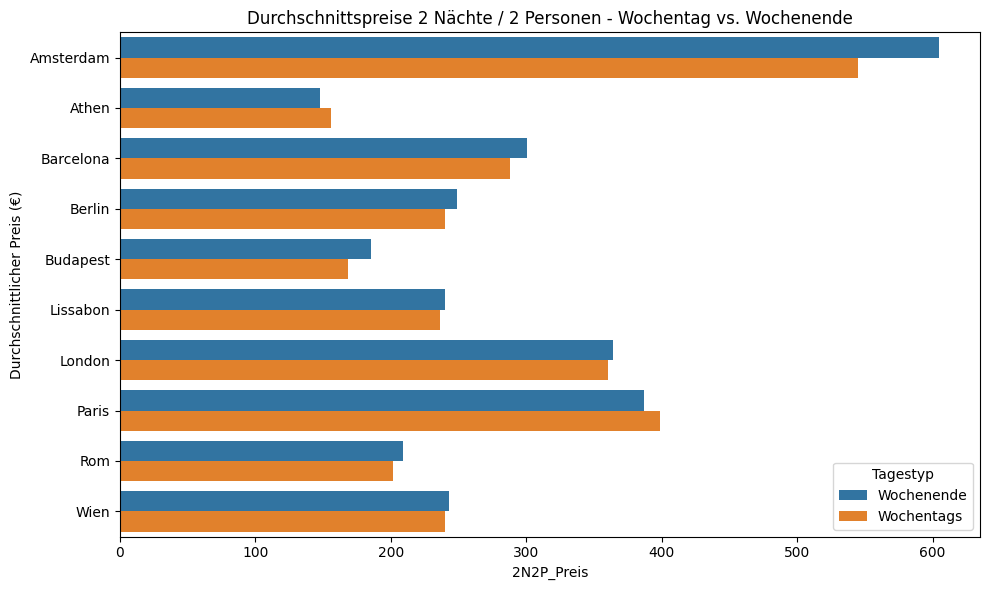

In [61]:
# Das ist der durchschnittliche Preis für Appartements und Privatzimmer nach Wochenende und Wochentag. Habe ich in meiner Präsentation aber nicht verwendet

preisvergleich = df.groupby(['Stadt', 'Tagestyp'])['2N2P_Preis'].mean().reset_index()       # gruppierung nach Tagestyp und Stadt

preisvergleich['2N2P_Preis'] = preisvergleich['2N2P_Preis'].round(2)

print(preisvergleich)

plt.figure(figsize=(10, 6))
sns.barplot(data=preisvergleich, y='Stadt', x='2N2P_Preis', hue='Tagestyp')        # Seaborn gruppiertt die Daten anhand von hue-Kategorie
plt.title('Durchschnittspreise 2 Nächte / 2 Personen - Wochentag vs. Wochenende')
plt.ylabel('Durchschnittlicher Preis (€)')
plt.tight_layout()
plt.show()

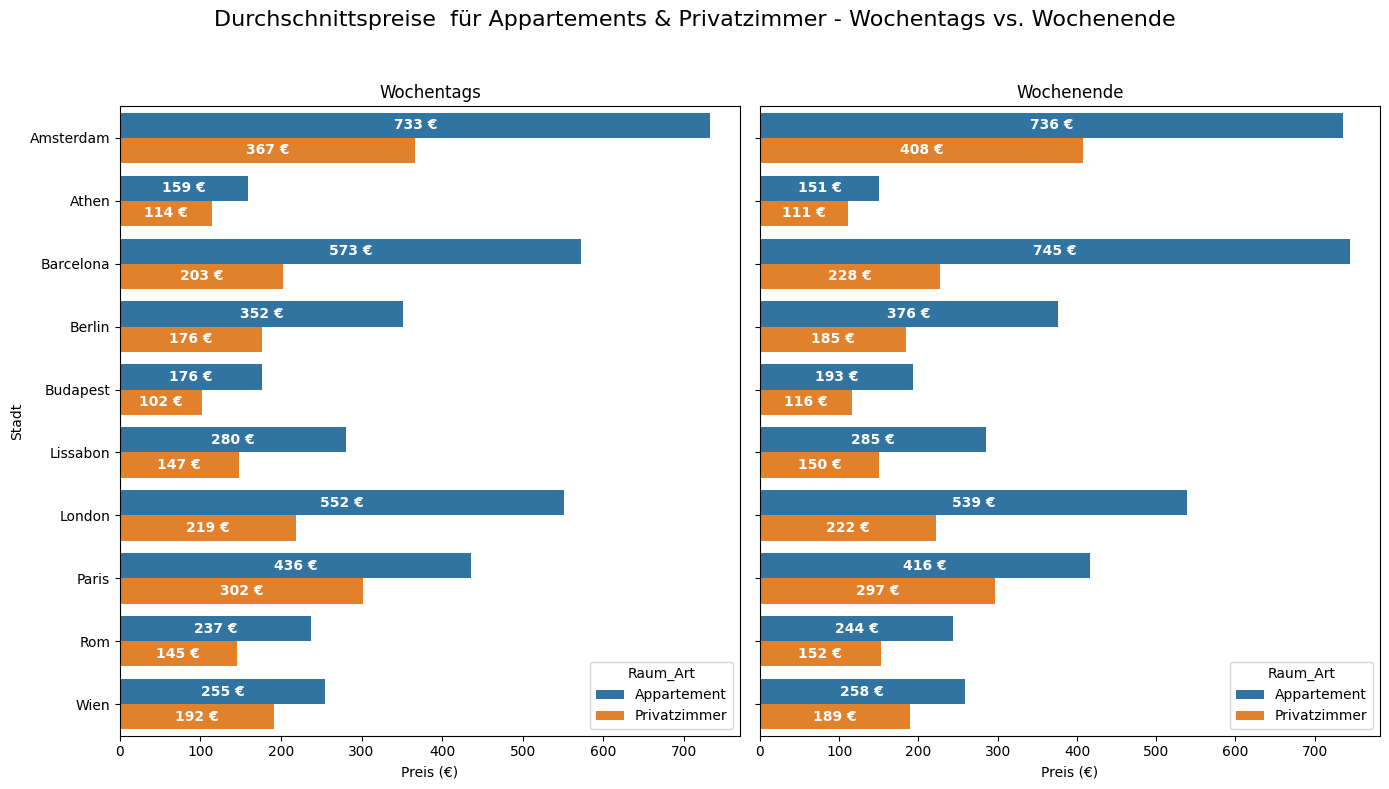

In [62]:
# finde diese Auswertung je Stadt Aufgegliedert in Appartements und Privatzimmer je zum Vergeleich Wochenende zu Wochentags interessanter
#In meiner Präsentation enthalten
preise_filtered = df[df['Raum_Art'].isin(['Appartement', 'Privatzimmer'])]  # nur Appartements und Privatzimmer filtern

preisvergleich = preise_filtered.groupby(['Stadt', 'Raum_Art', 'Tagestyp'])['2N2P_Preis'].mean().reset_index()
preisvergleich['2N2P_Preis'] = preisvergleich['2N2P_Preis'].round(2)    # Mittelwerte nach Stadt, Raumart und Tagestyp

preise_wochentag = preisvergleich[preisvergleich['Tagestyp'] == 'Wochentags']   # Aufteilen nach Tagestyp
preise_wochenende = preisvergleich[preisvergleich['Tagestyp'] == 'Wochenende']

fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)  # Subplots nebeneinander

sns.barplot(data=preise_wochentag, y='Stadt', x='2N2P_Preis', hue='Raum_Art', ax=axes[0])
axes[0].set_title('Wochentags')                          # Wochentagspreise links
axes[0].set_xlabel('Preis (€)')
axes[0].set_ylabel('Stadt')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f €', label_type='center',color= 'white', weight='bold')

sns.barplot(data=preise_wochenende, y='Stadt', x='2N2P_Preis', hue='Raum_Art', ax=axes[1])
axes[1].set_title('Wochenende')                               # Wochenendspreise rechts
axes[1].set_xlabel('Preis (€)')
axes[1].set_ylabel('')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f €', label_type='center',color='white', weight='bold')
    
plt.suptitle('Durchschnittspreise  für Appartements & Privatzimmer - Wochentags vs. Wochenende', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])# das begrenzt den Zeichenbereich der Achsen innerhalb der Figur 0=ganzlinks,0=ganzunten,1=ganzrechts,0.95 Platz für Titel
plt.show()

In [63]:
'''  Zuviel, da der Vortrag nur 10 bis 15 Minuten dauern soll, nicht in der Präsentation verwendet
bins = [1000, 2000, 4000, 8000, 16000, float('inf')]        #Preisgrenzen definieren
labels = ['1k-2k', '2k-4k', '4k-8k', '8k-16k', '>16k']

#staedte_ohne_top3 = df[~df['Stadt'].isin(['London', 'Paris', 'Amsterdam'])]      # London, Paris und Amsterdam rausnehmen

ausreisser_liste = []                    # leere Liste für Ergebnisse erstellen

for stadt in df['Stadt'].unique():      # alle Städte durchgehen
    df_stadt = df[df['Stadt'] == stadt]
    q1 = df_stadt['2N2P_Preis'].quantile(0.25)
    q3 = df_stadt['2N2P_Preis'].quantile(0.75)
    iqr = q3 - q1                                   # iqr steht für Interquartilsabstand
    grenze = q3 + 1.5 * iqr

    df_ausreisser = df_stadt[df_stadt['2N2P_Preis'] > grenze].copy()     # Ausreisser in dieser Stadt
    df_ausreisser['Preisgruppe'] = pd.cut(df_ausreisser['2N2P_Preis'], bins=bins, labels=labels)

    gruppiert = df_ausreisser['Preisgruppe'].value_counts().sort_index()

    for gruppe, anzahl in gruppiert.items():
        ausreisser_liste.append({'Stadt': stadt, 'Preisgruppe': gruppe, 'Anzahl': anzahl})

ausreisser_df = pd.DataFrame(ausreisser_liste)          # in Dataframe umwandeln

plt.figure(figsize=(10, 8))
sns.barplot(data=ausreisser_df, x='Stadt', y='Anzahl', hue='Preisgruppe', palette='coolwarm')
plt.title('Ausreißer pro Stadt nach Preisgruppen')
plt.xlabel('Stadt')
plt.ylabel('Anzahl Ausreißer')
plt.xticks(rotation=45)
plt.legend(title='Preisgruppe')
plt.tight_layout()
plt.show()
'''

"  Zuviel, da der Vortrag nur 10 bis 15 Minuten dauern soll, nicht in der Präsentation verwendet\nbins = [1000, 2000, 4000, 8000, 16000, float('inf')]        #Preisgrenzen definieren\nlabels = ['1k-2k', '2k-4k', '4k-8k', '8k-16k', '>16k']\n\n#staedte_ohne_top3 = df[~df['Stadt'].isin(['London', 'Paris', 'Amsterdam'])]      # London, Paris und Amsterdam rausnehmen\n\nausreisser_liste = []                    # leere Liste für Ergebnisse erstellen\n\nfor stadt in df['Stadt'].unique():      # alle Städte durchgehen\n    df_stadt = df[df['Stadt'] == stadt]\n    q1 = df_stadt['2N2P_Preis'].quantile(0.25)\n    q3 = df_stadt['2N2P_Preis'].quantile(0.75)\n    iqr = q3 - q1                                   # iqr steht für Interquartilsabstand\n    grenze = q3 + 1.5 * iqr\n\n    df_ausreisser = df_stadt[df_stadt['2N2P_Preis'] > grenze].copy()     # Ausreisser in dieser Stadt\n    df_ausreisser['Preisgruppe'] = pd.cut(df_ausreisser['2N2P_Preis'], bins=bins, labels=labels)\n\n    gruppiert = df_aus

#### 6. Geschäftsreisende vs. Touristen am Beispiel Amsterdams

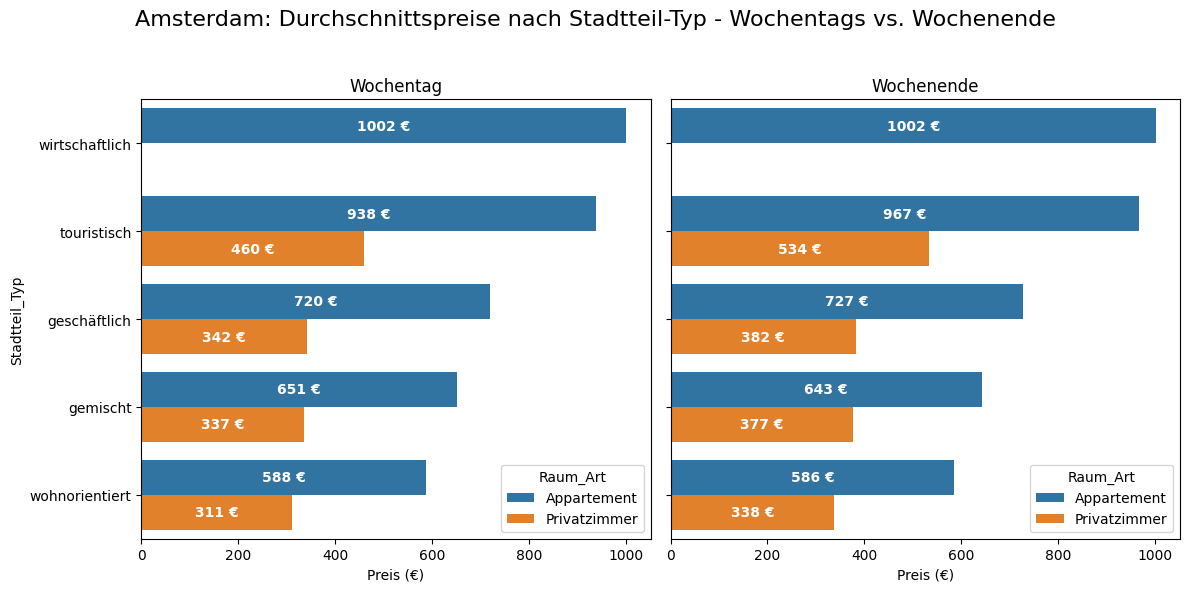

In [64]:
ams = df[(df['Stadt'] == 'Amsterdam') & (df['Stadtteil_Typ'].notna())]  # nur die Daten von Amsterdam sollen verwendet werden
ams = ams[ams['Raum_Art'].isin(['Privatzimmer', 'Appartement'])]

preisvergleich = (ams.groupby(['Stadtteil_Typ', 'Raum_Art', 'Tagestyp'])['2N2P_Preis'].mean().reset_index().round(2))  # gruppieren

wochentag = preisvergleich[preisvergleich['Tagestyp'] == 'Wochentags']
wochenende = preisvergleich[preisvergleich['Tagestyp'] == 'Wochenende']

order = wochentag[wochentag['Raum_Art'] == 'Appartement'].sort_values('2N2P_Preis', ascending=False)['Stadtteil_Typ']

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.barplot( data=wochentag, y='Stadtteil_Typ', x='2N2P_Preis', hue='Raum_Art', ax=axes[0],
            palette={'Appartement': '#1f77b4', 'Privatzimmer': '#ff7f0e'}, order=order)
axes[0].set_title('Wochentag')
axes[0].set_xlabel('Preis (€)')
axes[0].set_ylabel('Stadtteil_Typ')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f €', label_type='center',color= 'white', weight='bold')

sns.barplot( data=wochenende, y='Stadtteil_Typ', x='2N2P_Preis', hue='Raum_Art', ax=axes[1],
            palette={'Appartement': '#1f77b4', 'Privatzimmer': '#ff7f0e'}, order=order)
axes[1].set_title('Wochenende')
axes[1].set_xlabel('Preis (€)')
axes[1].set_ylabel('')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f €', label_type='center',color='white', weight='bold')

plt.suptitle('Amsterdam: Durchschnittspreise nach Stadtteil-Typ - Wochentags vs. Wochenende', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 7. Buchungshäufigkeit

In [65]:
top10_buchungen = (df.groupby(['Stadt', 'Raum_Art'])['Häufigkeiten'].max().reset_index().sort_values(by='Häufigkeiten', ascending=False).head(10))
top10_buchungen

,Stadt,Raum_Art,Häufigkeiten
21,Paris,Appartement,37
3,Athen,Appartement,25
18,London,Appartement,23
16,Lissabon,Privatzimmer,17
22,Paris,Privatzimmer,17
12,Budapest,Appartement,15
15,Lissabon,Appartement,14
19,London,Privatzimmer,14
24,Rom,Appartement,13
25,Rom,Privatzimmer,12


In [94]:
# Top 10 Buchungen nach Stadt und Raum_Art mit höchster Häufigkeit
top10_buchungen = (
    df[df['Superhost'] == True]
    .groupby(['Stadt', 'Raum_Art'])['Häufigkeiten']
    .max()
    .reset_index()
    .sort_values(by='Häufigkeiten', ascending=False)
    .head(10)
)

# Superhost-Info ergänzen
top10_buchungen = pd.merge(
    top10_buchungen,
    df[['Stadt', 'Raum_Art', 'Häufigkeiten', 'Superhost']],
    on=['Stadt', 'Raum_Art', 'Häufigkeiten'],
    how='left'
).drop_duplicates(subset=['Stadt', 'Raum_Art', 'Häufigkeiten'])

print(top10_buchungen)

        Stadt      Raum_Art  Häufigkeiten  Superhost
0    Lissabon  Privatzimmer            17       True
17   Budapest   Appartement            15       True
32      Paris  Privatzimmer            14       True
46   Lissabon   Appartement            13      False
59        Rom  Privatzimmer            12      False
71      Athen   Appartement            12       True
83       Wien   Appartement            12       True
95        Rom   Appartement            10       True
105    London   Appartement            10      False
115  Budapest  Privatzimmer             7      False


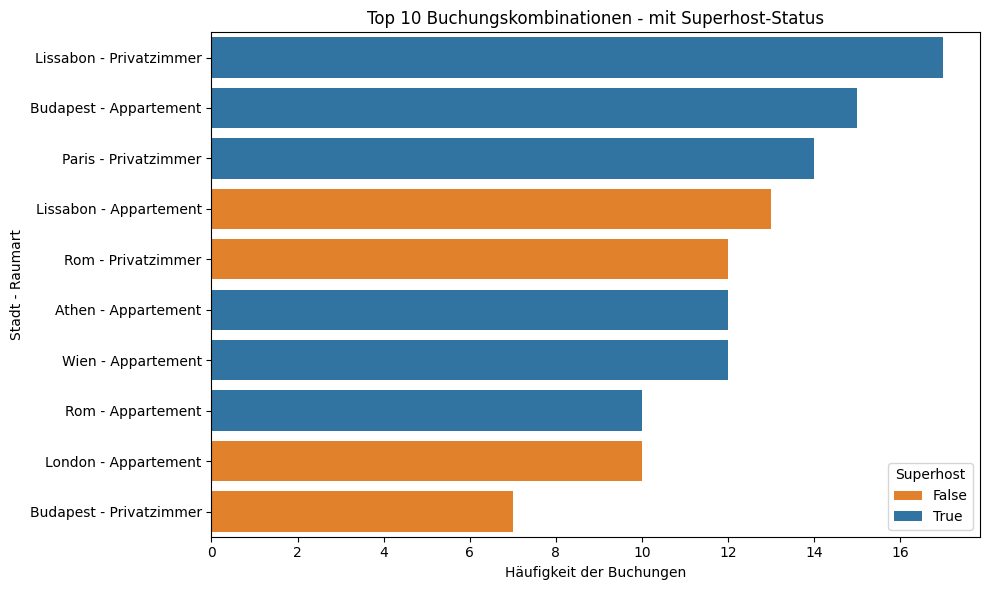

In [95]:
# Neue Spalte für Kombinationen (z. B. "Berlin – Appartement")
top10_buchungen['Kombination'] = top10_buchungen['Stadt'] + ' - ' + top10_buchungen['Raum_Art']

# Sortierung für besseres Layout
top10_buchungen = top10_buchungen.sort_values(by='Häufigkeiten', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_buchungen,
    x='Häufigkeiten',
    y='Kombination',
    hue='Superhost',
    palette={True: '#1f77b4', False: '#ff7f0e'}
)

plt.title('Top 10 Buchungskombinationen - mit Superhost-Status')
plt.xlabel('Häufigkeit der Buchungen')
plt.ylabel('Stadt - Raumart')
plt.legend(title='Superhost')
plt.tight_layout()
plt.show()

In [96]:
# Top 10 Buchungskombinationen nach Stadt und Raumart (mit höchster Buchungshäufigkeit)
top10_buchungen = (
    df.groupby(['Stadt', 'Raum_Art'])['Häufigkeiten']
    .max()
    .reset_index()
    .sort_values(by='Häufigkeiten', ascending=False)
    .head(10)
)

# Daten mit Original-DataFrame verbinden, um Anbieter_Typ zu erhalten
top10_details = df.merge(
    top10_buchungen,
    on=['Stadt', 'Raum_Art', 'Häufigkeiten']
)

# Anbieter-Typen zählen
anbieter_verteilung = top10_details['Anbieter_Typ'].value_counts(normalize=True) * 100
print(anbieter_verteilung.round(1))

Anbieter_Typ
Profianbieter     99.1
Einzelanbieter     0.9
Name: proportion, dtype: float64


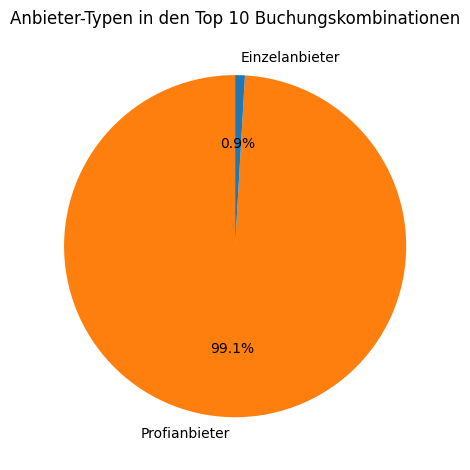

In [97]:
anbieter_verteilung.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#ff7f0e', '#1f77b4', '#2ca02c'],
    startangle=90,
    ylabel='',
    title='Anbieter-Typen in den Top 10 Buchungskombinationen'
)
plt.tight_layout()
plt.show()

In [98]:
# Gruppieren nach Superhost-Status und Mittelwert berechnen
avg_buchungen = df.groupby('Superhost')['Häufigkeiten'].mean().reset_index()

# Umbenennen für bessere Lesbarkeit
avg_buchungen.columns = ['Superhost', 'Durchschnittliche Buchungshäufigkeit']

print(avg_buchungen)

   Superhost  Durchschnittliche Buchungshäufigkeit
0      False                              2.020663
1       True                              1.953748


In [99]:
# Kreuztabelle: Superhost-Status nach Anbieter_Typ
kreuz = pd.crosstab(df['Anbieter_Typ'], df['Superhost'], normalize='index') * 100
kreuz = kreuz.round(1)
kreuz.columns = ['Nicht-Superhost (%)', 'Superhost (%)']
print(kreuz)

                Nicht-Superhost (%)  Superhost (%)
Anbieter_Typ                                      
Einzelanbieter                 73.5           26.5
Multianbieter                  67.8           32.2
Profianbieter                  80.9           19.1


In [100]:
print(df.columns)
print(top10_buchungen)

Index(['Unnamed: 0', '2N2P_Preis', 'Raum_Art', 'Zimmer_Shared',
       'Zimmer_Privat', 'Personenanzahl_max', 'Superhost', 'Host_(2-4)',
       'Host_4+', 'Sauberkeitsbew.', 'Gästebewertung', 'Schlafzimmer_Anzahl',
       'Entf_Stadtzentrum', 'Entf_Metrostation', 'Attraktivität',
       'Attraktivität_Normalisiert', 'Restaurant_Index',
       'Restaurant_Index_Normalisiert', 'lng', 'lat', 'Stadt', 'Tagestyp',
       'Stadtteil', 'Häufigkeiten', 'Stadtteil_Typ', 'Preiskategorie',
       'Anbieter_Typ'],
      dtype='object')
       Stadt      Raum_Art  Häufigkeiten
21     Paris   Appartement            37
3      Athen   Appartement            25
18    London   Appartement            23
16  Lissabon  Privatzimmer            17
22     Paris  Privatzimmer            17
12  Budapest   Appartement            15
15  Lissabon   Appartement            14
19    London  Privatzimmer            14
24       Rom   Appartement            13
25       Rom  Privatzimmer            12


In [102]:

top10_details = df.merge(top10_buchungen, on=['Stadt', 'Raum_Art', 'Häufigkeiten'])

superhost_typen = top10_details[top10_details['Superhost'] == True]['Anbieter_Typ'].value_counts(normalize=True) * 100
print(superhost_typen.round(1))

Anbieter_Typ
Profianbieter    100.0
Name: proportion, dtype: float64


### Zusammenfassung, Kommerzialisierung von Airbnb

In [1]:
stadt_attraktivität = df.groupby('Stadt')['Attraktivität_Normalisiert'].mean().reset_index().round(2)    # Durchschnittliche Attraktivität pro Stadt

stadt_attraktivität = stadt_attraktivität.sort_values(by='Attraktivität_Normalisiert', ascending=False)

print(stadt_attraktivität)

NameError: name 'df' is not defined

#### Ab hier nicht in der Präsentation verwendet, zwar interessant aber zu wenig Zeit zum Präsentieren

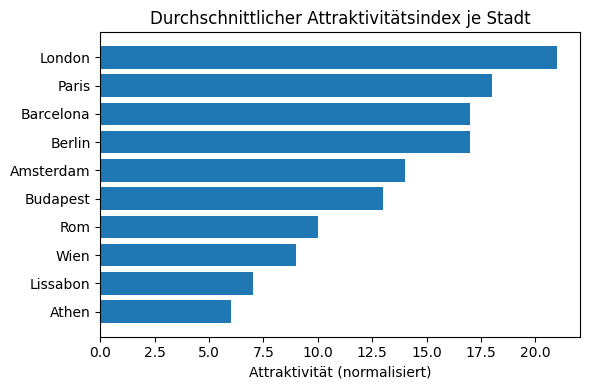

In [104]:
plt.figure(figsize=(6, 4))
plt.barh(stadt_attraktivität['Stadt'], stadt_attraktivität['Attraktivität_Normalisiert'], color='#1f77b4')
plt.xlabel('Attraktivität (normalisiert)')
plt.title('Durchschnittlicher Attraktivitätsindex je Stadt')
plt.gca().invert_yaxis()  # Beste Stadt oben
plt.tight_layout()
plt.show()

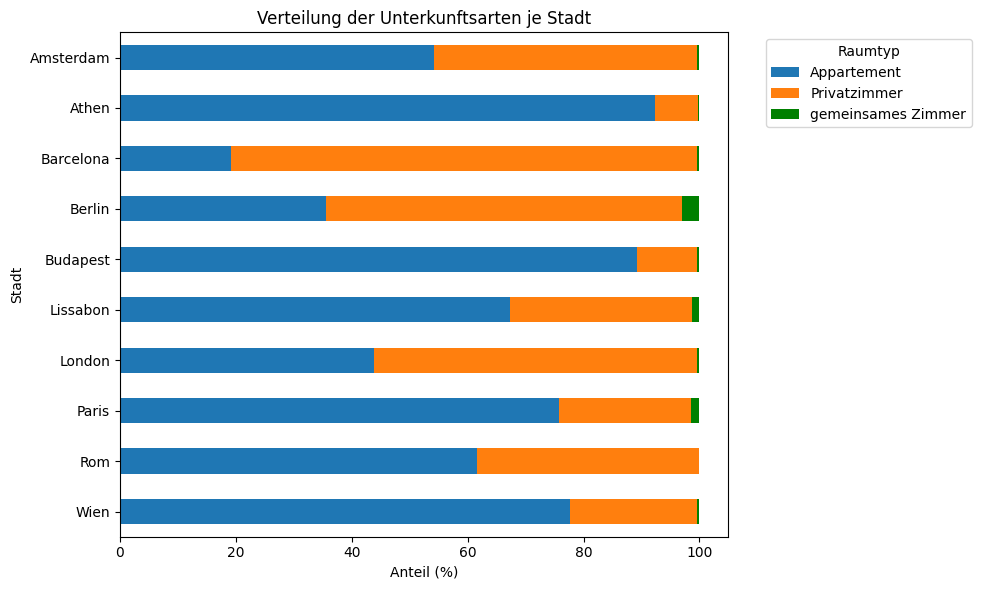

In [105]:

pivot = raumtypen_prozent.pivot(index='Stadt', columns='Raum_Art', values='Prozent').fillna(0)

pivot = pivot.sort_index(ascending=False)
# Gestapelter Balkenplot
pivot.plot(kind='barh', stacked=True, figsize=(10, 6), color=[ '#1f77b4', '#ff7f0e','green'])

plt.xlabel('Anteil (%)')
plt.title('Verteilung der Unterkunftsarten je Stadt')
plt.legend(title='Raumtyp', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


--- Amsterdam ---
Absolute Anzahl:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                  843.0          196.0           87.0
Privatzimmer                 425.0          387.0          132.0
gemeinsames Zimmer             4.0            6.0            0.0

 Prozentuale Verteilung:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                   74.9           17.4            7.7
Privatzimmer                  45.0           41.0           14.0
gemeinsames Zimmer            40.0           60.0            0.0


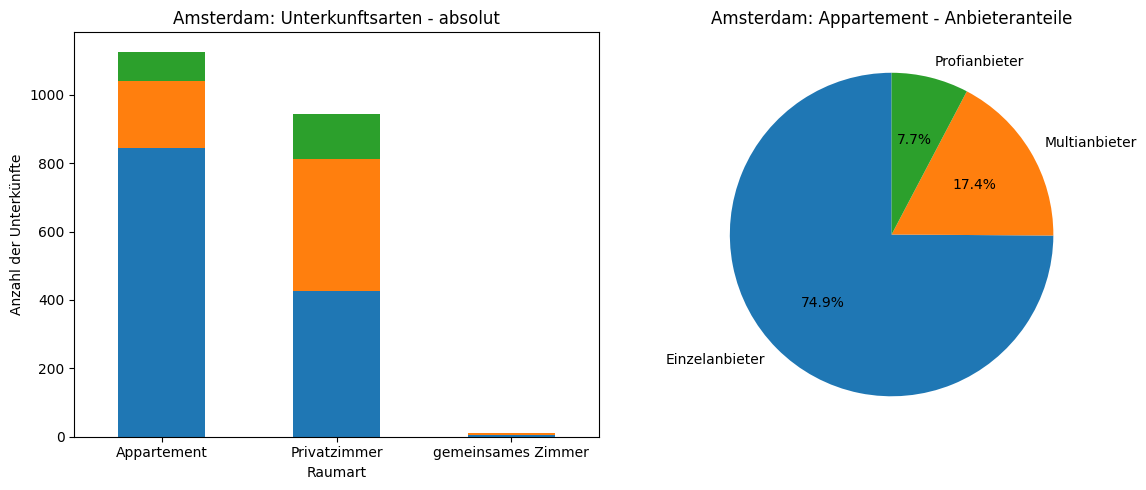

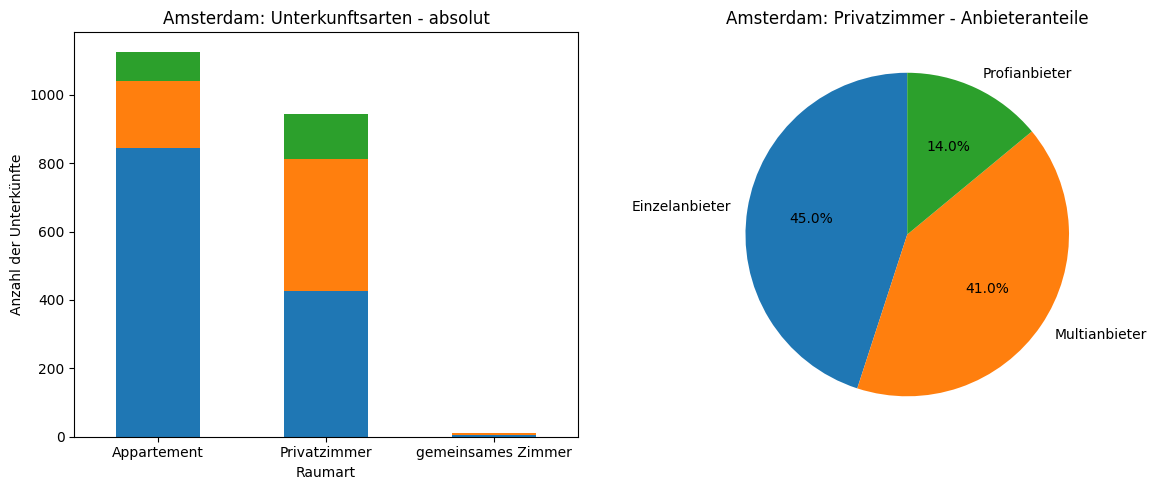

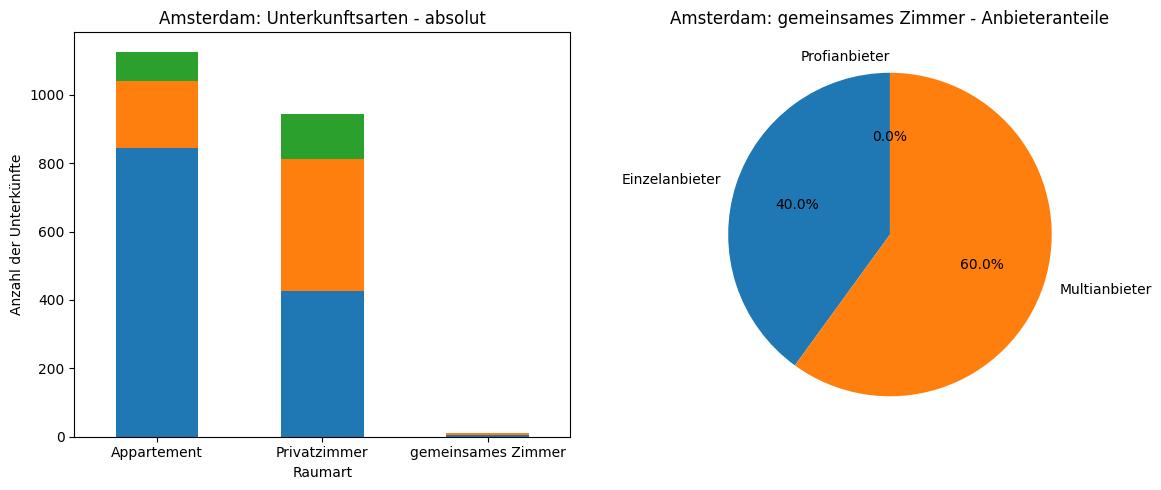


--- Athen ---
Absolute Anzahl:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                 1783.0         1270.0         1819.0
Privatzimmer                  79.0          137.0          181.0
gemeinsames Zimmer             0.0            5.0            6.0

 Prozentuale Verteilung:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                   36.6           26.1           37.3
Privatzimmer                  19.9           34.5           45.6
gemeinsames Zimmer             0.0           45.5           54.5


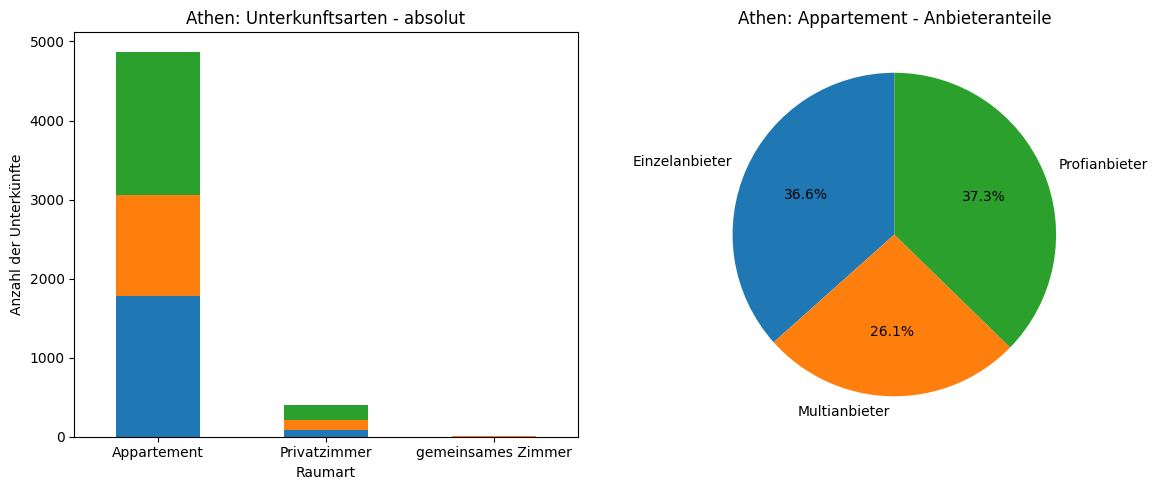

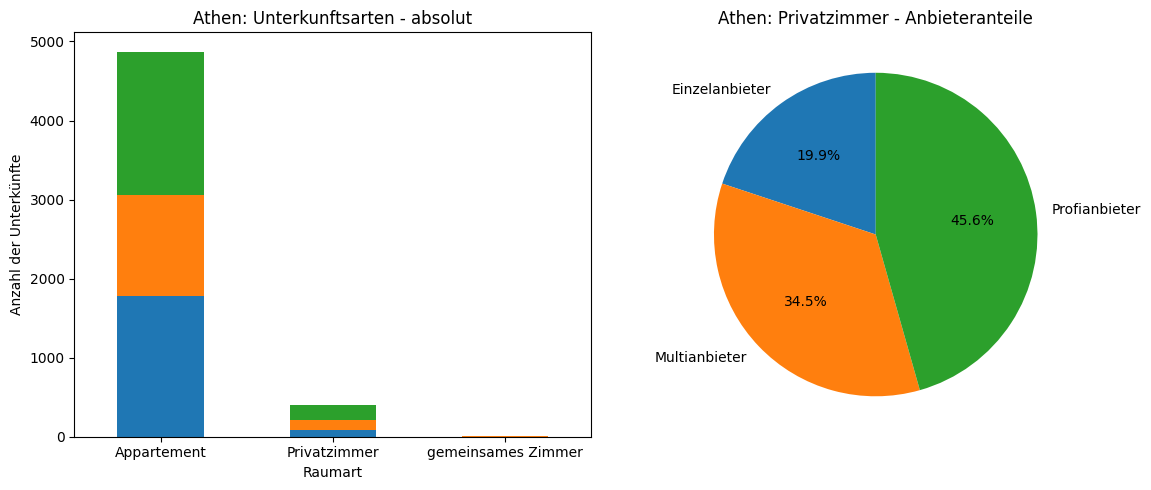

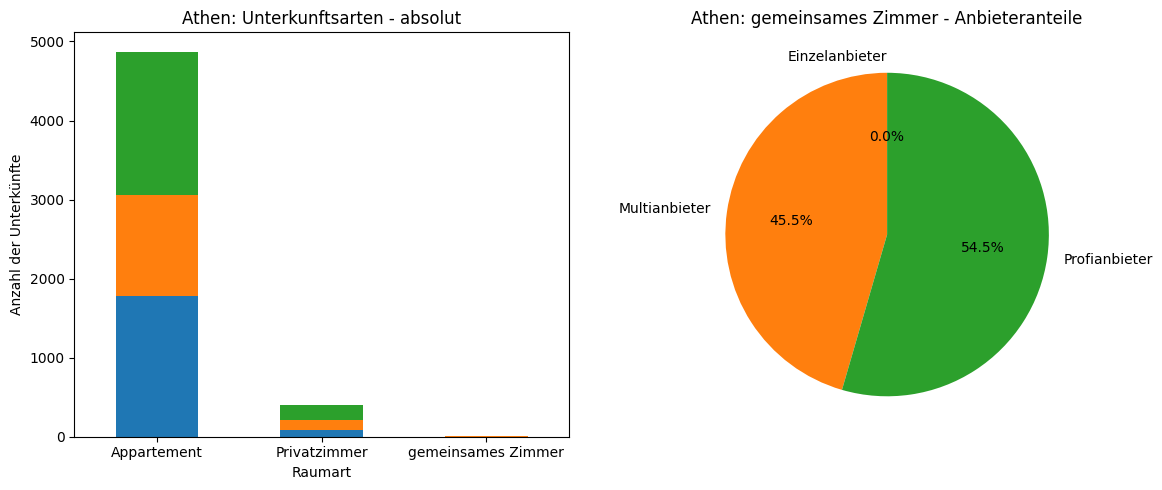


--- Barcelona ---
Absolute Anzahl:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                     74             79            389
Privatzimmer                   745           1010            524
gemeinsames Zimmer               1              2              9

 Prozentuale Verteilung:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                   13.7           14.6           71.8
Privatzimmer                  32.7           44.3           23.0
gemeinsames Zimmer             8.3           16.7           75.0


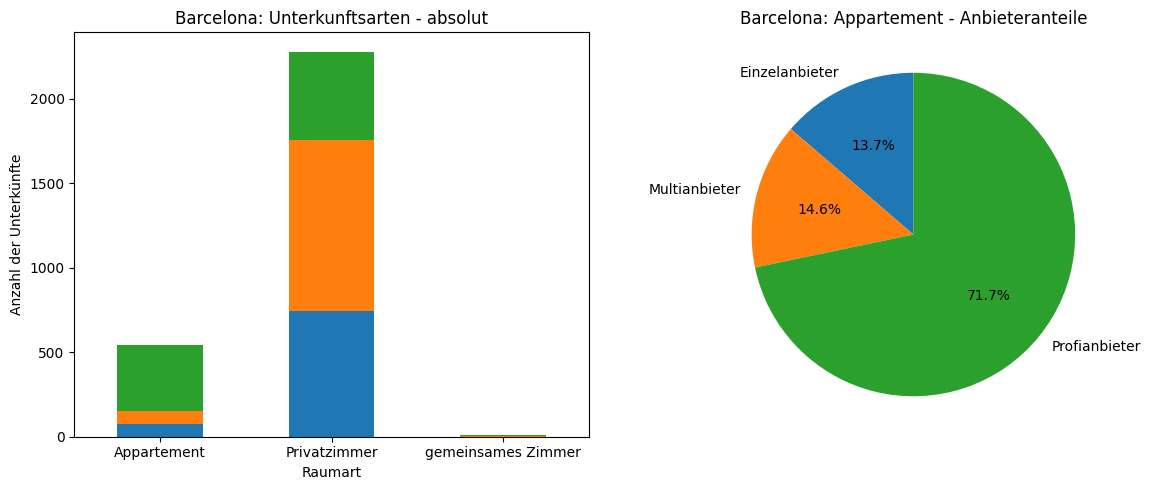

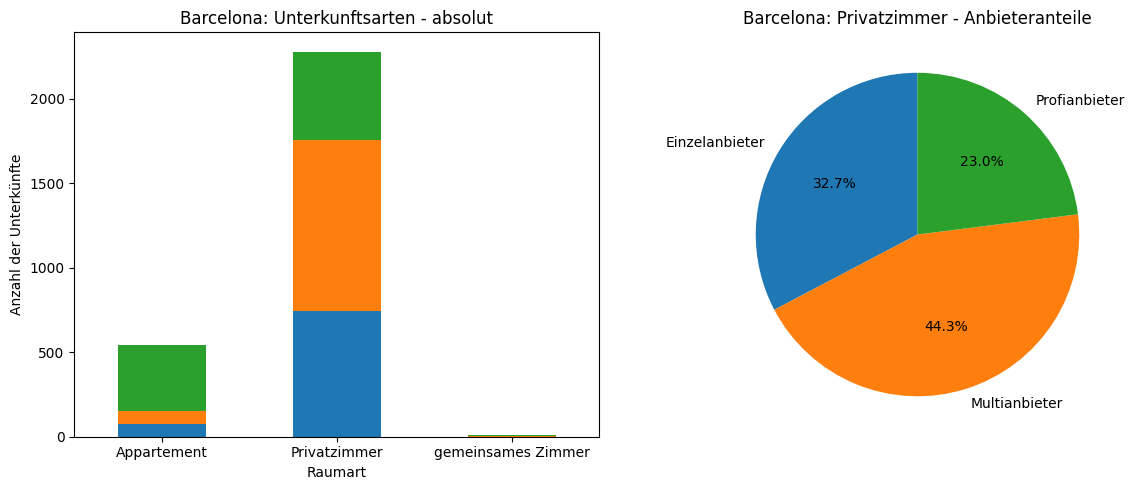

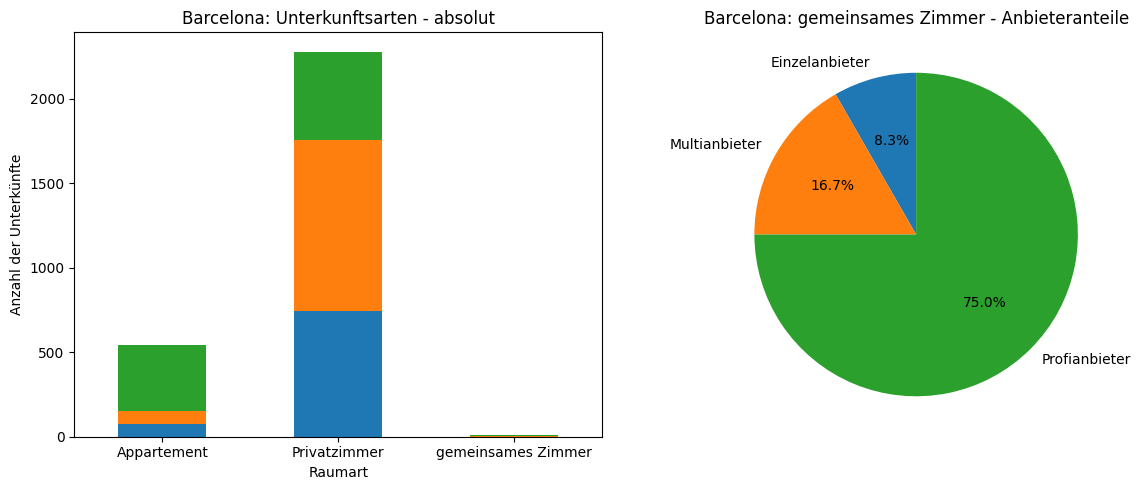


--- Berlin ---
Absolute Anzahl:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                    438            220            224
Privatzimmer                   910            462            157
gemeinsames Zimmer              16              4             53

 Prozentuale Verteilung:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                   49.7           24.9           25.4
Privatzimmer                  59.5           30.2           10.3
gemeinsames Zimmer            21.9            5.5           72.6


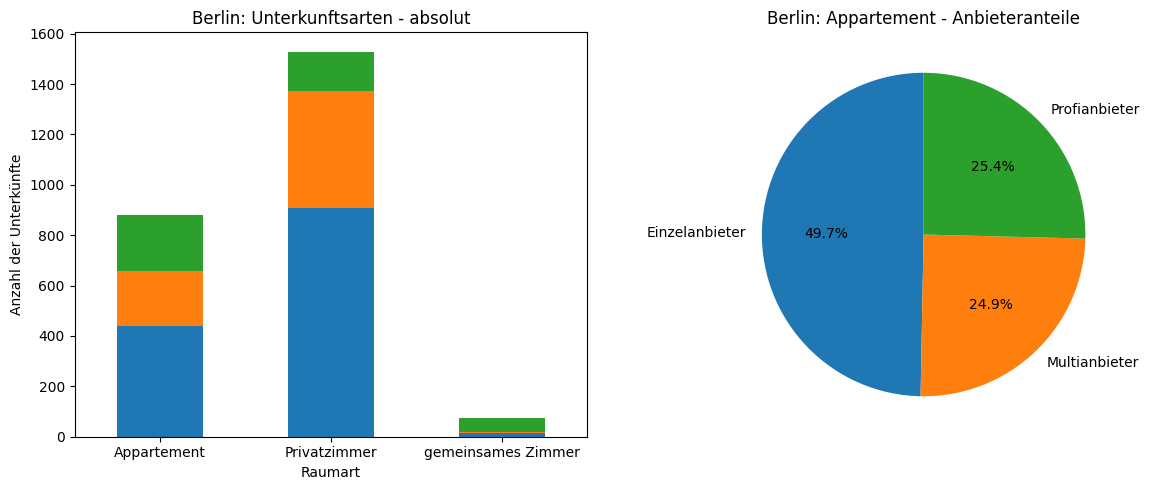

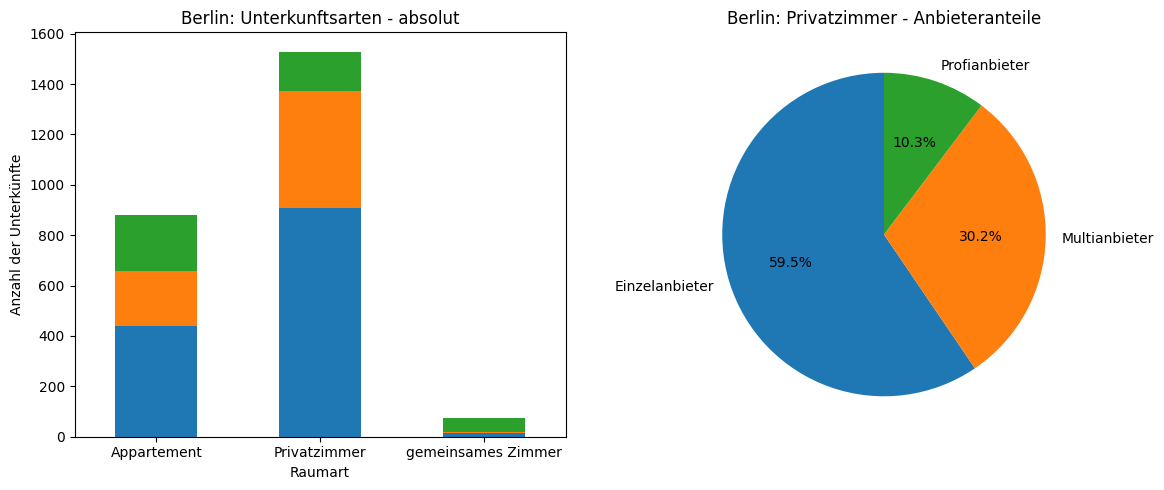

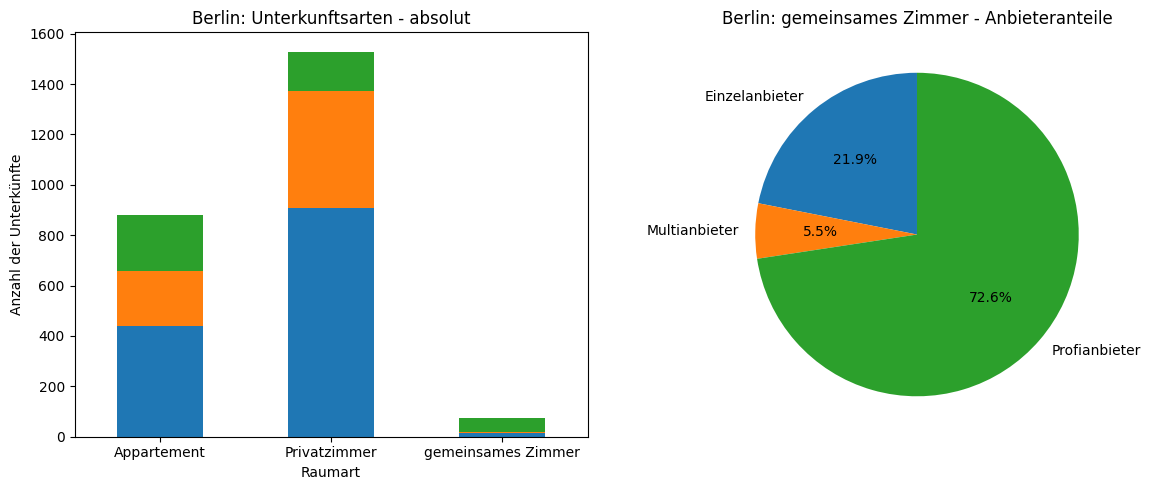


--- Budapest ---
Absolute Anzahl:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                   1310           1012           1267
Privatzimmer                    86            207            126
gemeinsames Zimmer               3              1             10

 Prozentuale Verteilung:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                   36.5           28.2           35.3
Privatzimmer                  20.5           49.4           30.1
gemeinsames Zimmer            21.4            7.1           71.4


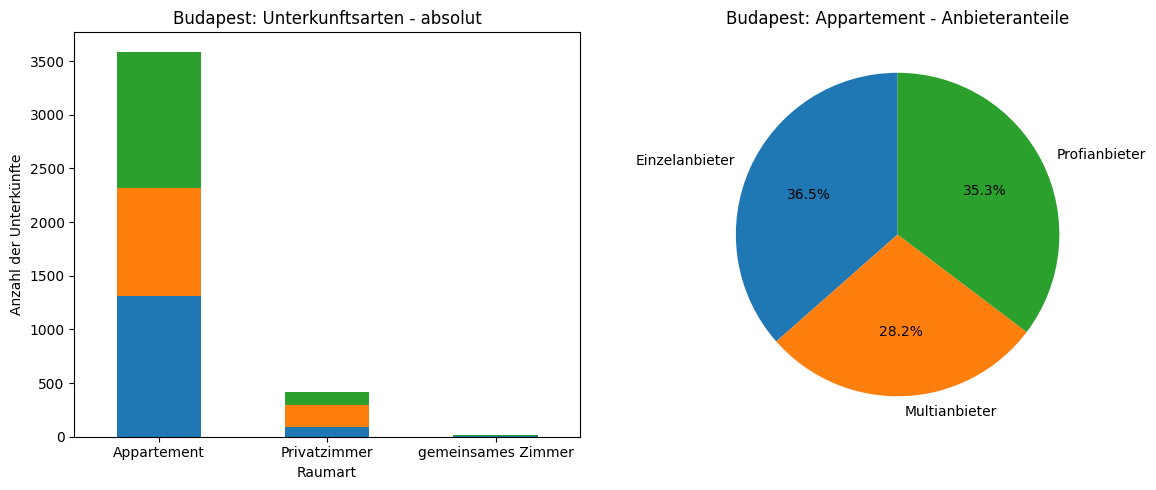

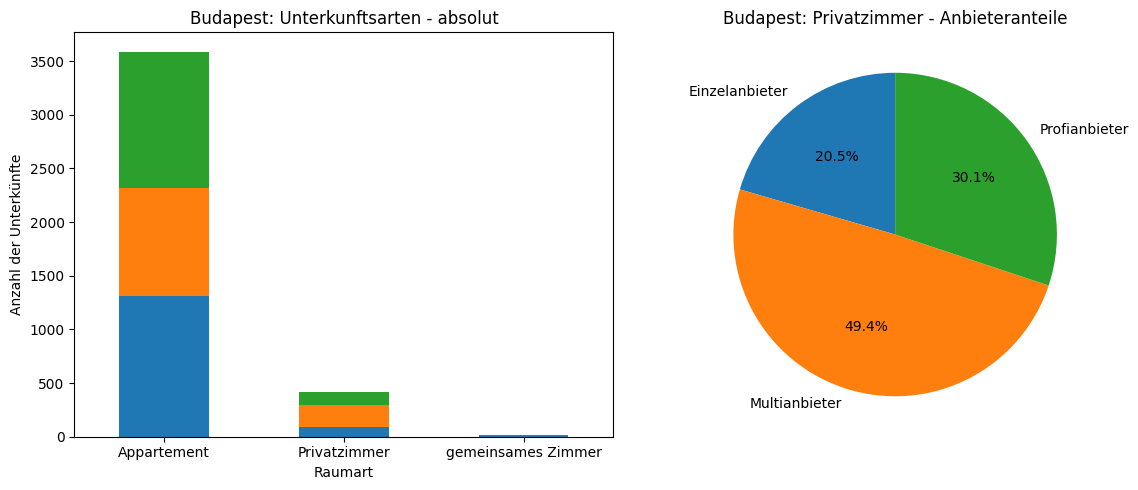

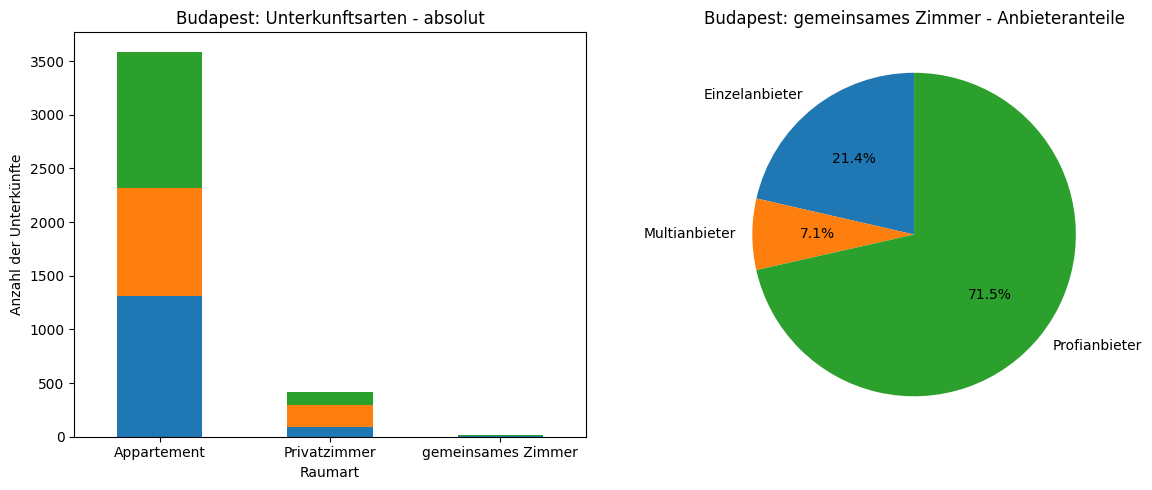


--- Lissabon ---
Absolute Anzahl:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                    846            898           2134
Privatzimmer                   149            464           1198
gemeinsames Zimmer               2             18             54

 Prozentuale Verteilung:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                   21.8           23.2           55.0
Privatzimmer                   8.2           25.6           66.2
gemeinsames Zimmer             2.7           24.3           73.0


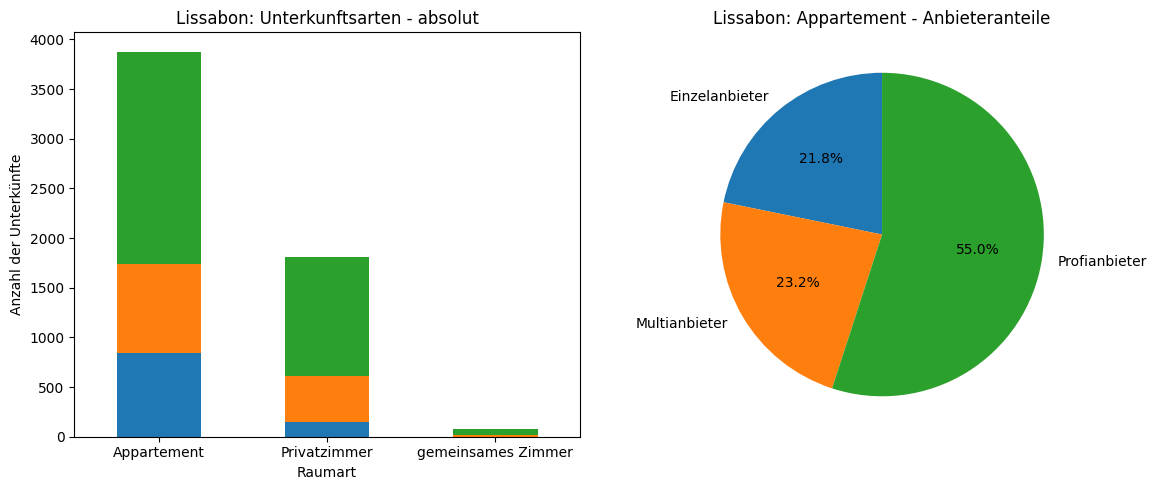

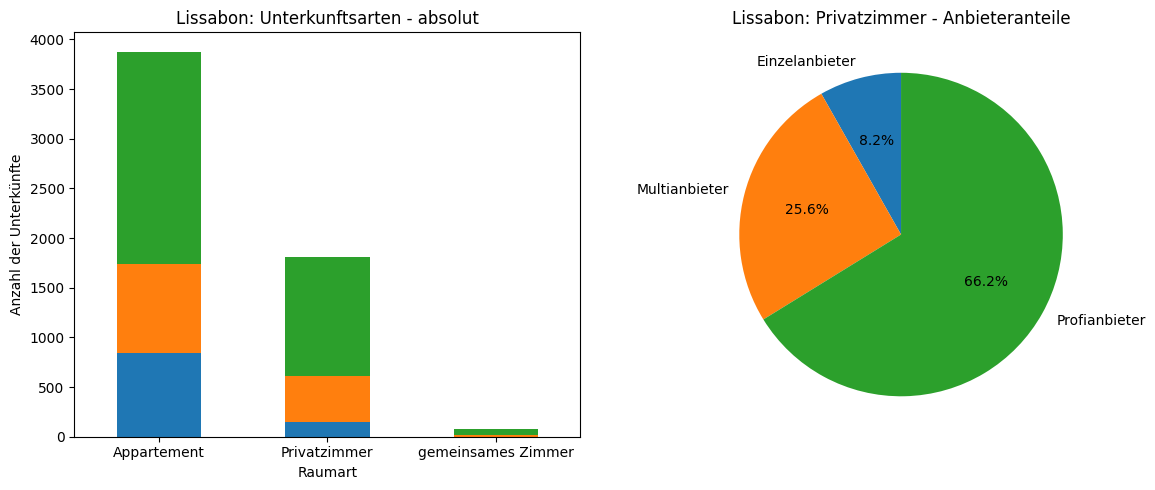

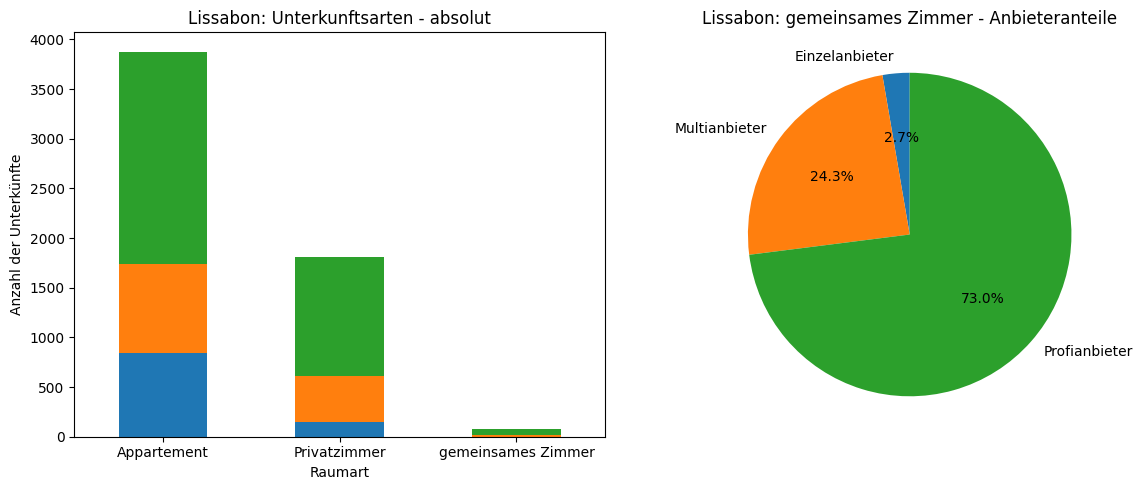


--- London ---
Absolute Anzahl:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                   1399            918           2067
Privatzimmer                  1947           1817           1795
gemeinsames Zimmer              23             13             14

 Prozentuale Verteilung:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                   31.9           20.9           47.1
Privatzimmer                  35.0           32.7           32.3
gemeinsames Zimmer            46.0           26.0           28.0


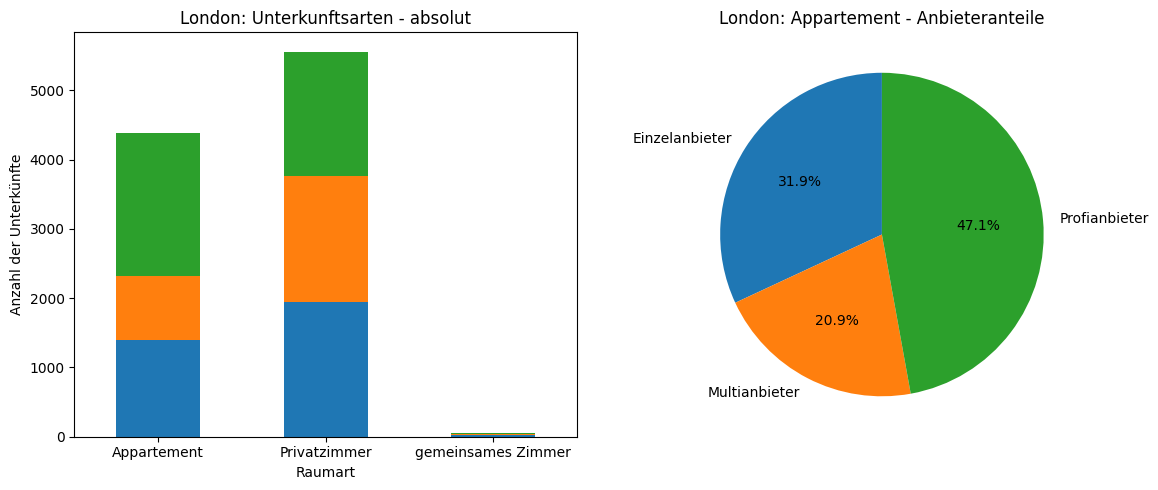

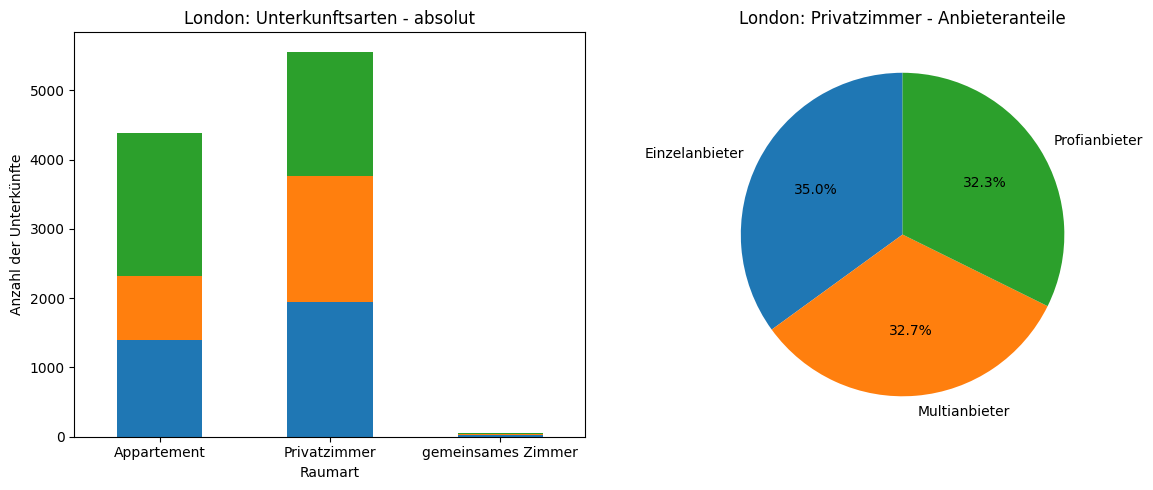

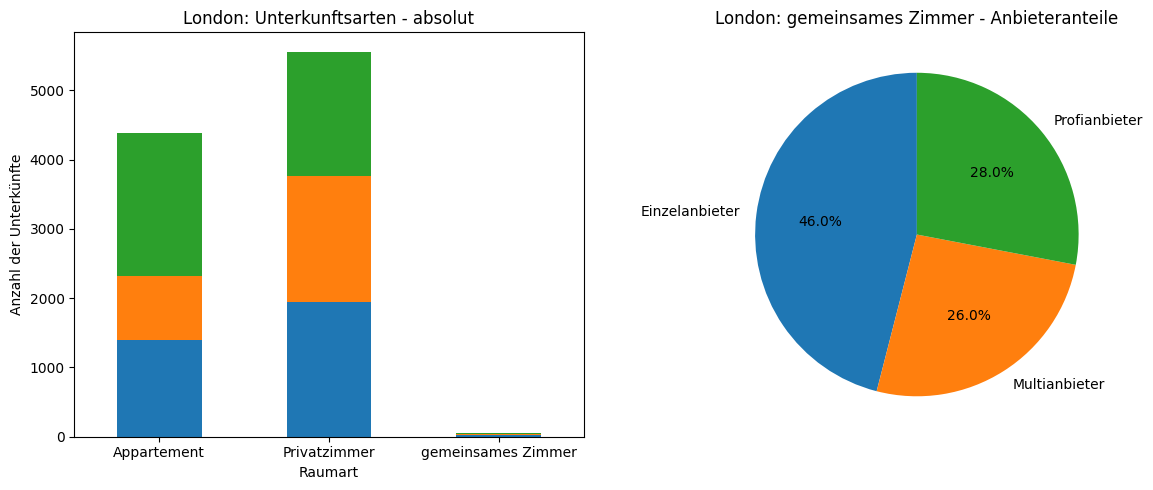


--- Paris ---
Absolute Anzahl:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                   3087            872           1108
Privatzimmer                   470            583            474
gemeinsames Zimmer              19             13             62

 Prozentuale Verteilung:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                   60.9           17.2           21.9
Privatzimmer                  30.8           38.2           31.0
gemeinsames Zimmer            20.2           13.8           66.0


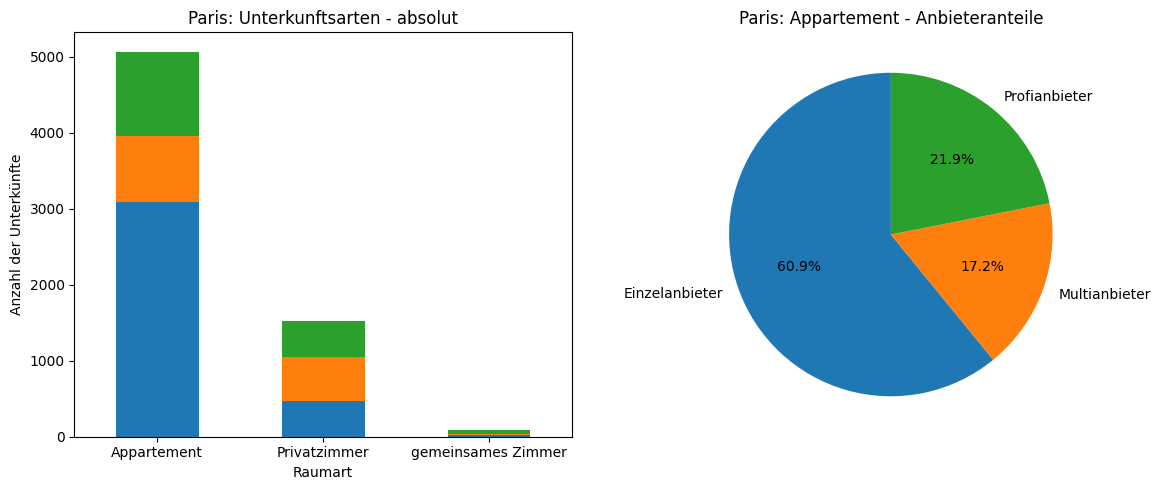

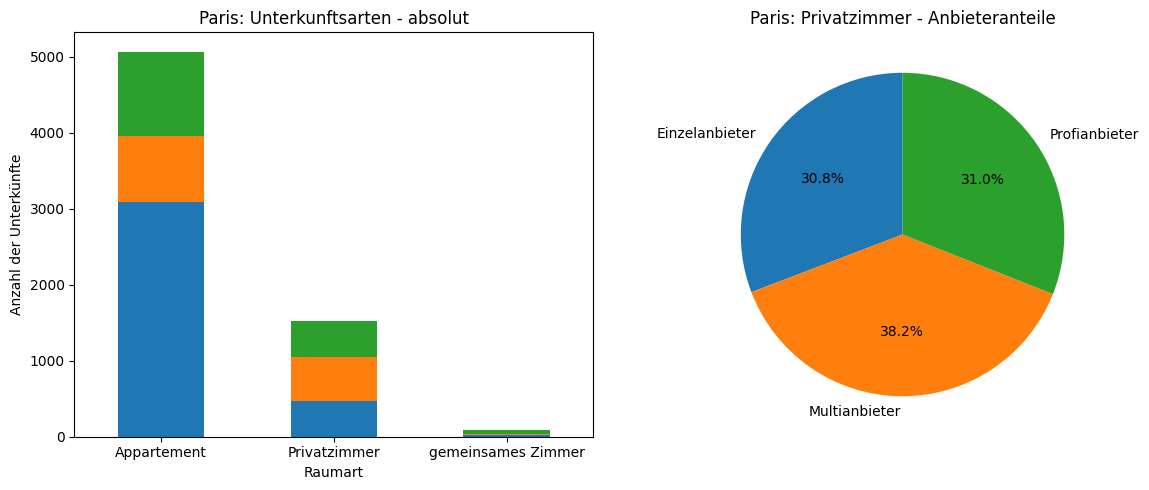

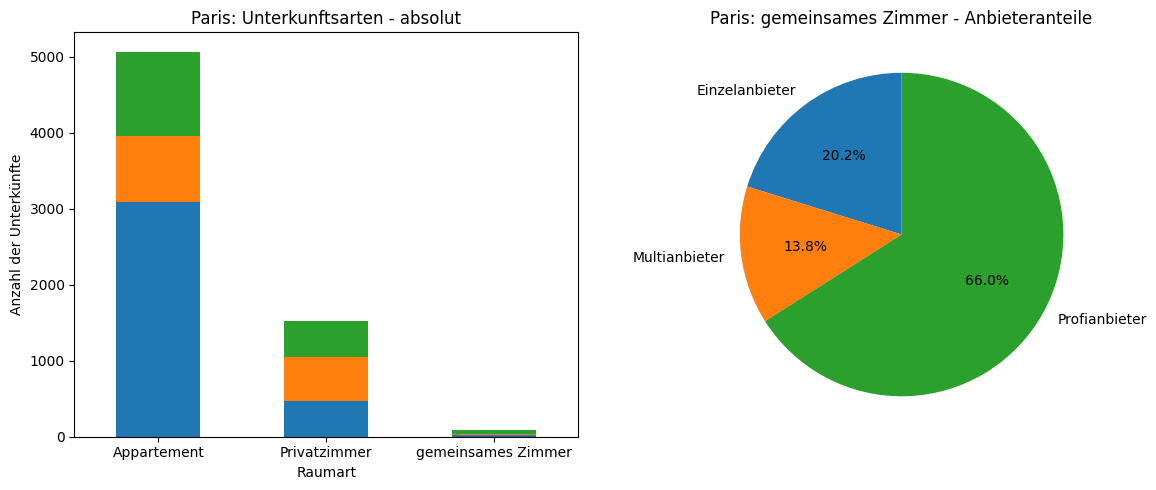


--- Rom ---
Absolute Anzahl:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                 2068.0         1813.0         1680.0
Privatzimmer                 459.0         1666.0         1329.0
gemeinsames Zimmer             0.0            5.0            7.0

 Prozentuale Verteilung:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                   37.2           32.6           30.2
Privatzimmer                  13.3           48.2           38.5
gemeinsames Zimmer             0.0           41.7           58.3


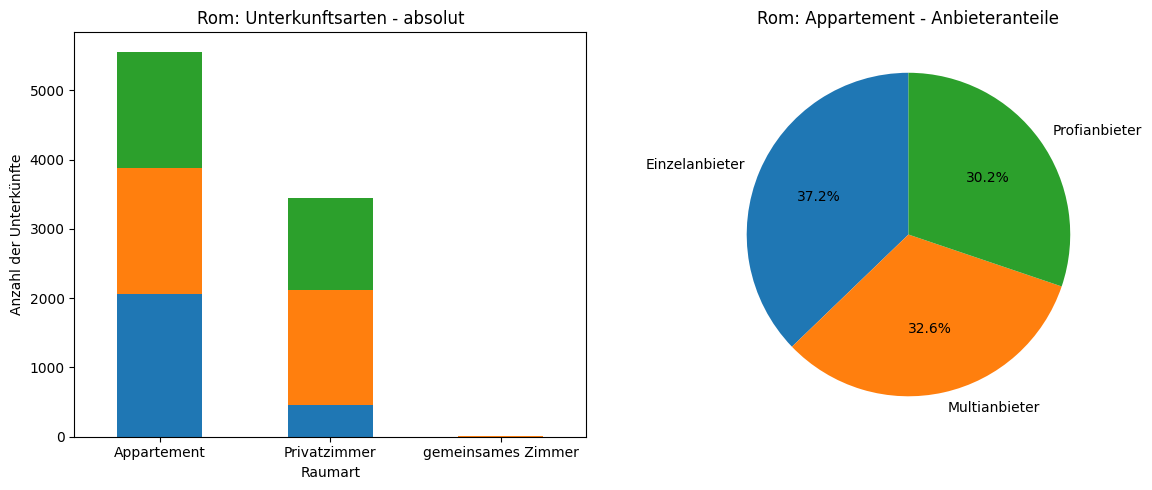

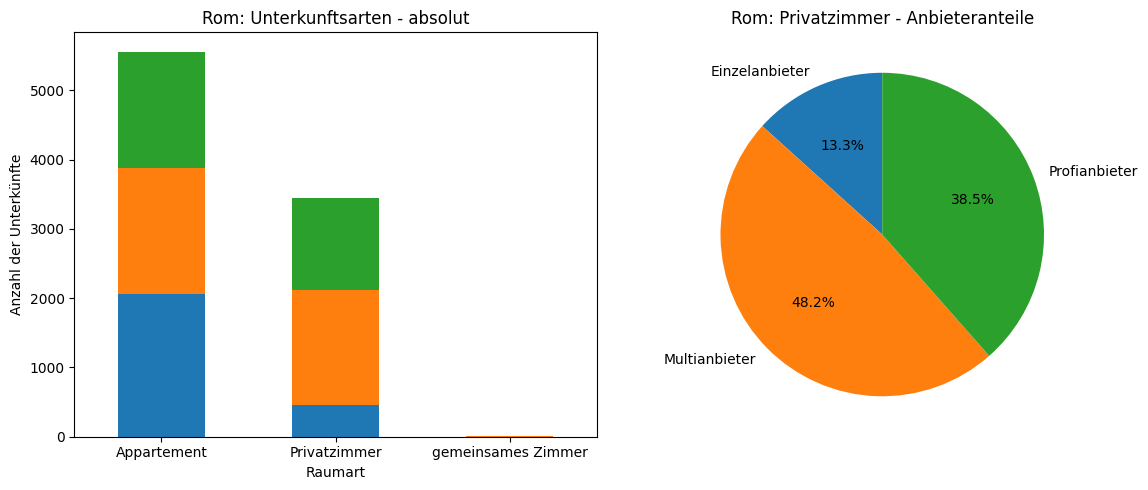

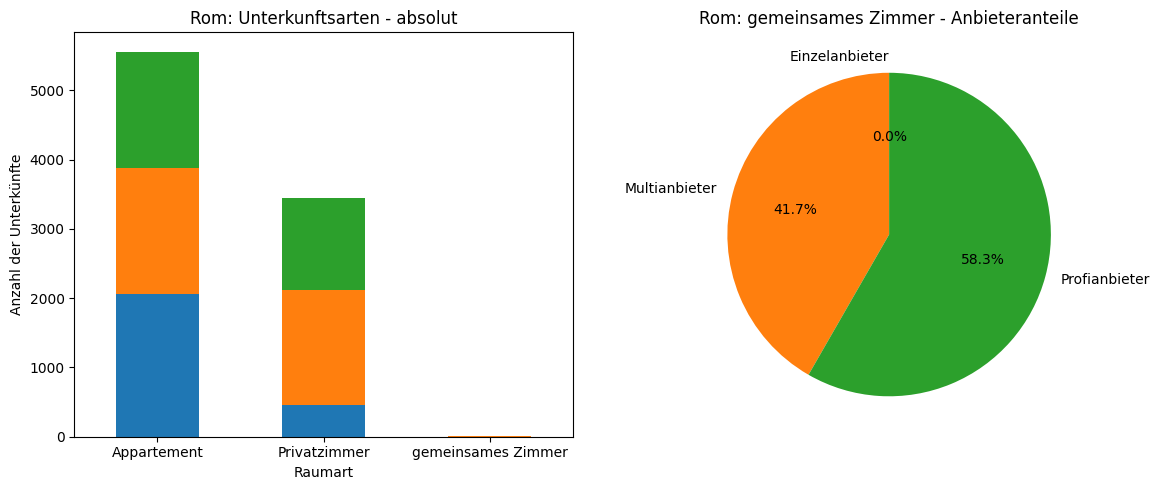


--- Wien ---
Absolute Anzahl:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                    985            719           1043
Privatzimmer                   360            260            154
gemeinsames Zimmer               3              8              5

 Prozentuale Verteilung:
Anbieter_Typ        Einzelanbieter  Multianbieter  Profianbieter
Raum_Art                                                        
Appartement                   35.9           26.2           38.0
Privatzimmer                  46.5           33.6           19.9
gemeinsames Zimmer            18.8           50.0           31.2


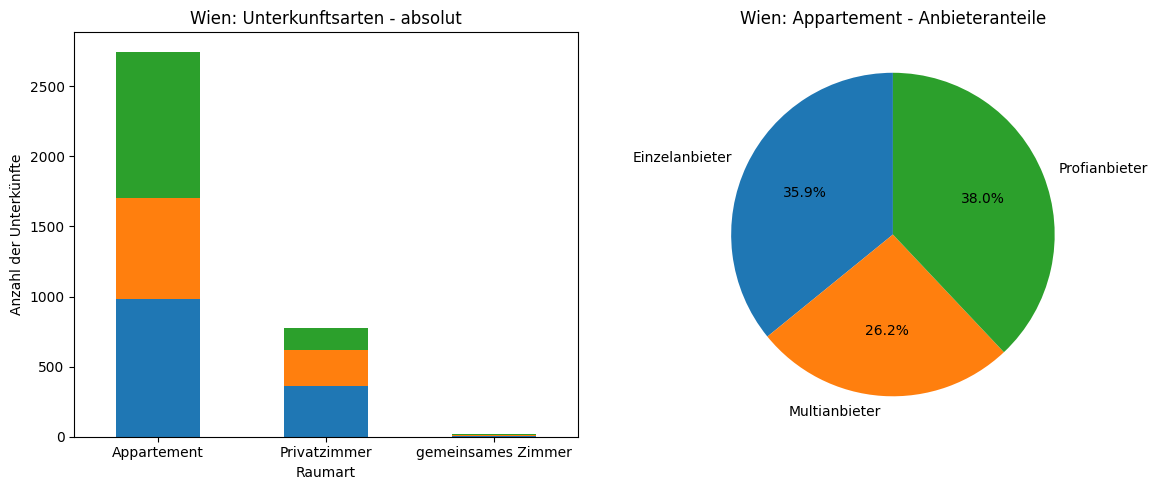

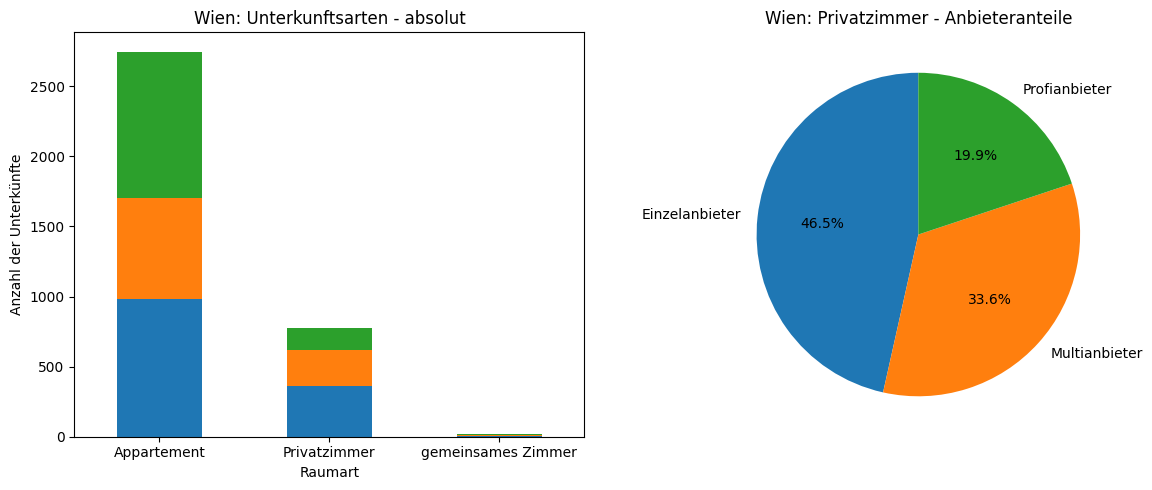

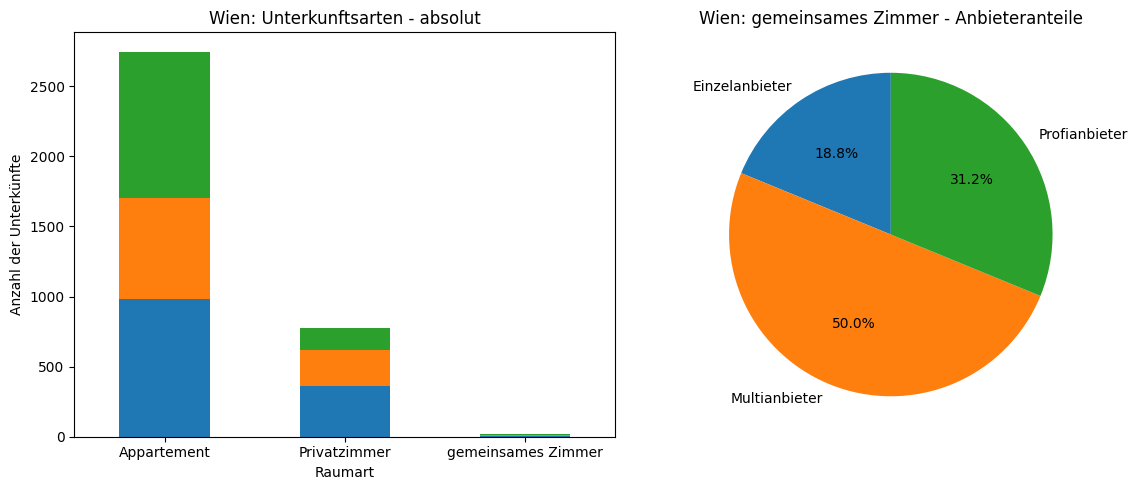

In [106]:
#ab hier nicht mehr für Präsentation verwendet
raum_stadt = df.groupby(['Stadt', 'Anbieter_Typ', 'Raum_Art']).size().reset_index(name='Anzahl')  # gruppierung nach Raumarten pro Anbietertyp

for stadt in raum_stadt['Stadt'].unique():                      # für jede Stadt einzeln ein gestaüeltes Balkendiagramm
    df_stadt = raum_stadt[raum_stadt['Stadt'] == stadt].copy()

    pivot_abs = df_stadt.pivot(index='Raum_Art', columns='Anbieter_Typ', values='Anzahl').fillna(0) # Pivot für absolute Werte

    pivot_pct = pivot_abs.div(pivot_abs.sum(axis=1), axis=0) * 100          # Prozentanteile je Raumart berechnen
    pivot_pct = pivot_pct.round(1)
    

    print(f'\n--- {stadt} ---')                  # Tabellen ausgeben   
    print('Absolute Anzahl:')
    print(pivot_abs)
    print('\n Prozentuale Verteilung:')
    print(pivot_pct)

    for raum_art in pivot_pct.index:
        werte = pivot_pct.loc[raum_art]
        labels = werte.index
        sizes = werte.values

        if sizes.sum() == 0:
            continue

        fig, axes = plt.subplots(1, 2, figsize=(12, 5))         # erzeugt eine Zeichenfläche(fig) für mehrere Teilbereiche(axes)


        pivot_abs.plot(kind='bar', stacked=True, ax=axes[0], legend=False)           # Säulendiagramm links
        axes[0].set_title(f'{stadt}: Unterkunftsarten - absolut')
        axes[0].set_xlabel('Raumart')
        axes[0].set_ylabel('Anzahl der Unterkünfte')
        axes[0].tick_params(axis='x', rotation=0)
   
        
        axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)          # Kreisdiagramm rechts
        axes[1].set_title(f'{stadt}: {raum_art} - Anbieteranteile')
        
        plt.tight_layout()
        plt.show()

In [107]:
df.to_csv('df_airbnb.csv', index=False)

In [4]:
df = pd.read_csv(r'C:\Users\thort\Documents\DataSmart Point\Unterrichtsmaterialien\05. Python Weiterführung\04. Projektwoche\Projektdaten\Thorsten_Teetzen_Projektwoche_Python\df_original.csv')

C:\Users\thort\AppData\Local\Temp\ipykernel_25104\173797154.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\thort\Documents\DataSmart Point\Unterrichtsmaterialien\05. Python Weiterführung\04. Projektwoche\Projektdaten\Thorsten_Teetzen_Projektwoche_Python\df_original.csv')


In [8]:
df['Stadtteil']

0          Noord
1        Centrum
2           Oost
3        Centrum
4        Centrum
          ...   
51702        NaN
51703        NaN
51704        NaN
51705        NaN
51706        NaN
Name: Stadtteil, Length: 51707, dtype: object